In [ ]:
# Install the pandas library for data manipulation and analysis
!pip install pandas

# Install the numpy library for numerical computations
!pip install numpy

# Install the matplotlib library for data visualization
!pip install matplotlib

# Install the statsmodels library for statistical modeling
!pip install statsmodels

# Install the pandas_datareader library to read data from various online sources into pandas dataframes
!pip install pandas_datareader

# Install the datetime library for working with dates and times
!pip install datetime

# Install the yfinance library for accessing Yahoo Finance data
!pip install yfinance

# Install the scikit-learn library for machine learning
!pip install scikit-learn

# Install the PyPortfolioOpt library for portfolio optimization
!pip install PyPortfolioOpt

# Install the pandas-ta library for technical analysis indicators with pandas
!pip install pandas-ta


In [ ]:
# Import the RollingOLS function from statsmodels for rolling (moving window) ordinary least squares regression
from statsmodels.regression.rolling import RollingOLS

# Import the data module from pandas_datareader to fetch data from online sources
import pandas_datareader.data as web

# Import the pyplot module from matplotlib for plotting and visualizations
import matplotlib.pyplot as plt

# Import the main statsmodels module for statistical modeling
import statsmodels.api as sm

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computations
import numpy as np

# Import datetime as dt for working with date and time objects
import datetime as dt

# Import yfinance as yf to fetch financial data from Yahoo Finance
import yfinance as yf

# Import pandas_ta for technical analysis indicators using pandas
import pandas_ta

# Import the warnings module and set it to ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Assuming your Excel file is named 'data.xlsx' and the column you want to read is 'Column_name'
df = pd.read_csv('ind_nifty100list.csv')

# Access the specific column by its name and append .NS to each symbol
symbols_list = [symbol + '.NS' for symbol in df['Symbol'].unique().tolist()]

# Remove 'UNITDSPR.NS' from the list as data not available on yfinance
symbols_list = [symbol for symbol in symbols_list if symbol != 'UNITDSPR.NS']

# Display the resulting list of symbols
symbols_list


['ABB.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BANKBARODA.NS',
 'BERGEPAINT.NS',
 'BEL.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CANBK.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'COLPAL.NS',
 'DLF.NS',
 'DABUR.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'GODREJCP.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HAVELLS.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HAL.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ICICIGI.NS',
 'ICICIPRULI.NS',
 'ITC.NS',
 'IOC.NS',
 'IRCTC.NS',
 'IRFC.NS',
 'INDUSINDBK.NS',
 'NAUKRI.NS',
 'INFY.NS',
 'INDIGO.NS',
 'JSWSTEEL.NS',
 'JINDALSTEL.NS',
 'JIOFIN.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'LICI.NS',
 'M&M.NS',
 'MARICO.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLE

In [ ]:
# Set the end date for the data retrieval
end_date = '2023-09-27'

# Calculate the start date by subtracting 8 years (365 days * 8) from the end date
start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 8)

#df = yf.download(tickers = "TTML.NS", start=start_date, end=end_date)

# Download the stock data for the list of symbols from Yahoo Finance within the date range
df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

# Rename the index levels for better clarity
df.index.names = ['date', 'ticker']

# Convert the column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Display the resulting DataFrame
df.dropna(inplace=True)
df

[*********************100%%**********************]  100 of 100 completed


Price                      adj close       close        high         low  \
date       ticker                                                          
2015-09-29 ABB.NS         908.436218  949.120850  953.569397  924.744873   
           ADANIENT.NS     41.716164   43.074444   44.681900   41.848415   
           ADANIPORTS.NS  283.115387  297.399994  304.950012  293.000000   
           ADANIPOWER.NS   24.500000   24.500000   24.700001   23.500000   
           AMBUJACEM.NS   173.665039  203.000000  207.649994  196.250000   
...                              ...         ...         ...         ...   
2023-09-26 VBL.NS         966.730530  967.549988  974.900024  927.150024   
           VEDL.NS        209.591141  224.000000  227.199997  223.649994   
           WIPRO.NS       412.021301  412.899994  416.799988  411.700012   
           ZOMATO.NS       99.900002   99.900002  100.400002   97.900002   
           ZYDUSLIFE.NS   598.049988  598.049988  605.950012  596.500000   

Price                           open      volume  
date       ticker                                 
2015-09-29 ABB.NS         948.712341     97769.0  
           ADANIENT.NS     42.801991   7114293.0  
           ADANIPORTS.NS  304.000000   5666979.0  
           ADANIPOWER.NS   24.200001   5374474.0  
           AMBUJACEM.NS   200.500000   2655447.0  
...                              ...         ...  
2023-09-26 VBL.NS         932.299988   4971977.0  
           VEDL.NS        225.000000   4392920.0  
           WIPRO.NS       416.799988   3240283.0  
           ZOMATO.NS       98.599998  36822528.0  
           ZYDUSLIFE.NS   603.450012    963978.0  

[182375 rows x 6 columns]

In [ ]:
# Calculate the Garman-Klass volatility for each row and store it in a new column 'garman_klass_vol'
# This is a measure of stock price volatility that uses high, low, open, and close prices
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2 * np.log(2) - 1) * ((np.log(df['adj close']) - np.log(df['open']))**2)

# Calculate the Relative Strength Index (RSI) for each stock and store it in a new column 'rsi'
# RSI is a momentum oscillator that measures the speed and change of price movements
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

# Calculate the lower Bollinger Band for each stock and store it in a new column 'bb_low'
# Bollinger Bands are volatility bands placed above and below a moving average
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

# Calculate the middle Bollinger Band (moving average) for each stock and store it in a new column 'bb_mid'
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

# Calculate the upper Bollinger Band for each stock and store it in a new column 'bb_high'
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])

# Define a function to compute the Average True Range (ATR) for a given stock's data
# ATR is a measure of volatility introduced by market technician J. Welles Wilder Jr.
def compute_atr(stock_data):
    # Calculate the ATR using high, low, and close prices over a 14-day period
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    # Normalize the ATR by subtracting its mean and dividing by its standard deviation
    return atr.sub(atr.mean()).div(atr.std())

# Apply the compute_atr function to each stock in the DataFrame and store the result in a new column 'atr'
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

# Display the resulting DataFrame
df


Price                      adj close       close        high         low  \
date       ticker                                                          
2015-09-29 ABB.NS         908.436218  949.120850  953.569397  924.744873   
           ADANIENT.NS     41.716164   43.074444   44.681900   41.848415   
           ADANIPORTS.NS  283.115387  297.399994  304.950012  293.000000   
           ADANIPOWER.NS   24.500000   24.500000   24.700001   23.500000   
           AMBUJACEM.NS   173.665039  203.000000  207.649994  196.250000   
...                              ...         ...         ...         ...   
2023-09-26 VBL.NS         966.730530  967.549988  974.900024  927.150024   
           VEDL.NS        209.591141  224.000000  227.199997  223.649994   
           WIPRO.NS       412.021301  412.899994  416.799988  411.700012   
           ZOMATO.NS       99.900002   99.900002  100.400002   97.900002   
           ZYDUSLIFE.NS   598.049988  598.049988  605.950012  596.500000   

Price                           open      volume  garman_klass_vol        rsi  \
date       ticker                                                               
2015-09-29 ABB.NS         948.712341     97769.0         -0.000256        NaN   
           ADANIENT.NS     42.801991   7114293.0          0.001891        NaN   
           ADANIPORTS.NS  304.000000   5666979.0         -0.001158        NaN   
           ADANIPOWER.NS   24.200001   5374474.0          0.001182        NaN   
           AMBUJACEM.NS   200.500000   2655447.0         -0.006381        NaN   
...                              ...         ...               ...        ...   
2023-09-26 VBL.NS         932.299988   4971977.0          0.000753  71.286454   
           VEDL.NS        225.000000   4392920.0         -0.001820  32.253772   
           WIPRO.NS       416.799988   3240283.0          0.000024  45.229151   
           ZOMATO.NS       98.599998  36822528.0          0.000252  59.034982   
           ZYDUSLIFE.NS   603.450012    963978.0          0.000092  41.153861   

Price                       bb_low    bb_mid   bb_high       atr  
date       ticker                                                 
2015-09-29 ABB.NS              NaN       NaN       NaN       NaN  
           ADANIENT.NS         NaN       NaN       NaN       NaN  
           ADANIPORTS.NS       NaN       NaN       NaN       NaN  
           ADANIPOWER.NS       NaN       NaN       NaN       NaN  
           AMBUJACEM.NS        NaN       NaN       NaN       NaN  
...                            ...       ...       ...       ...  
2023-09-26 VBL.NS         6.787873  6.821219  6.854565  1.698510  
           VEDL.NS        5.347880  5.394722  5.441565 -1.014162  
           WIPRO.NS       6.003548  6.054552  6.105556  0.077410  
           ZOMATO.NS      4.571229  4.606687  4.642144 -0.386928  
           ZYDUSLIFE.NS   6.395291  6.440497  6.485703  0.857566  

[182375 rows x 12 columns]

In [ ]:
# Calculate the dollar volume for each row and store it in a new column 'dollar_volume'
# Dollar volume is calculated as the product of the adjusted closing price and the volume, divided by 1,000,000 to convert to millions
df['dollar_volume'] = (df['adj close'] * df['volume']) / 1e6

# Display the resulting DataFrame
df


Price                      adj close       close        high         low  \
date       ticker                                                          
2015-09-29 ABB.NS         908.436218  949.120850  953.569397  924.744873   
           ADANIENT.NS     41.716164   43.074444   44.681900   41.848415   
           ADANIPORTS.NS  283.115387  297.399994  304.950012  293.000000   
           ADANIPOWER.NS   24.500000   24.500000   24.700001   23.500000   
           AMBUJACEM.NS   173.665039  203.000000  207.649994  196.250000   
...                              ...         ...         ...         ...   
2023-09-26 VBL.NS         966.730530  967.549988  974.900024  927.150024   
           VEDL.NS        209.591141  224.000000  227.199997  223.649994   
           WIPRO.NS       412.021301  412.899994  416.799988  411.700012   
           ZOMATO.NS       99.900002   99.900002  100.400002   97.900002   
           ZYDUSLIFE.NS   598.049988  598.049988  605.950012  596.500000   

Price                           open      volume  garman_klass_vol        rsi  \
date       ticker                                                               
2015-09-29 ABB.NS         948.712341     97769.0         -0.000256        NaN   
           ADANIENT.NS     42.801991   7114293.0          0.001891        NaN   
           ADANIPORTS.NS  304.000000   5666979.0         -0.001158        NaN   
           ADANIPOWER.NS   24.200001   5374474.0          0.001182        NaN   
           AMBUJACEM.NS   200.500000   2655447.0         -0.006381        NaN   
...                              ...         ...               ...        ...   
2023-09-26 VBL.NS         932.299988   4971977.0          0.000753  71.286454   
           VEDL.NS        225.000000   4392920.0         -0.001820  32.253772   
           WIPRO.NS       416.799988   3240283.0          0.000024  45.229151   
           ZOMATO.NS       98.599998  36822528.0          0.000252  59.034982   
           ZYDUSLIFE.NS   603.450012    963978.0          0.000092  41.153861   

Price                       bb_low    bb_mid   bb_high       atr  \
date       ticker                                                  
2015-09-29 ABB.NS              NaN       NaN       NaN       NaN   
           ADANIENT.NS         NaN       NaN       NaN       NaN   
           ADANIPORTS.NS       NaN       NaN       NaN       NaN   
           ADANIPOWER.NS       NaN       NaN       NaN       NaN   
           AMBUJACEM.NS        NaN       NaN       NaN       NaN   
...                            ...       ...       ...       ...   
2023-09-26 VBL.NS         6.787873  6.821219  6.854565  1.698510   
           VEDL.NS        5.347880  5.394722  5.441565 -1.014162   
           WIPRO.NS       6.003548  6.054552  6.105556  0.077410   
           ZOMATO.NS      4.571229  4.606687  4.642144 -0.386928   
           ZYDUSLIFE.NS   6.395291  6.440497  6.485703  0.857566   

Price                     dollar_volume  
date       ticker                        
2015-09-29 ABB.NS             88.816901  
           ADANIENT.NS       296.781011  
           ADANIPORTS.NS    1604.408952  
           ADANIPOWER.NS     131.674613  
           AMBUJACEM.NS      461.158307  
...                                 ...  
2023-09-26 VBL.NS           4806.561959  
           VEDL.NS           920.717114  
           WIPRO.NS         1335.065618  
           ZOMATO.NS        3678.570603  
           ZYDUSLIFE.NS      576.507031  

[182375 rows x 13 columns]

 Aggregate to monthly level and filter top 150 most liquid stocks for each month.
To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.

In [ ]:
# Define a list of columns to keep for further analysis, excluding specified columns
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

# Resample the 'dollar_volume' column to monthly frequency, taking the mean for each month
# Then, unstack the 'ticker' level of the index and convert it to a DataFrame
dollar_volume_monthly = df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

# Resample the specified columns to monthly frequency, taking the last value for each month
# Then, unstack the index and stack the 'ticker' level back
last_cols_monthly = df.unstack()[last_cols].resample('M').last().stack('ticker')

# Concatenate the two DataFrames along the columns, aligning on the index
# Drop rows with any missing values
data = pd.concat([dollar_volume_monthly, last_cols_monthly], axis=1).dropna()

# Display the resulting DataFrame
data


dollar_volume    adj close       atr   bb_high  \
date       ticker                                                          
2015-10-31 ABB.NS             52.859629  1075.794800 -0.474987  7.045925   
           ADANIENT.NS       429.754414    48.761204 -0.655645  3.982920   
           ADANIPORTS.NS     849.925995   282.020599 -0.910460  5.759688   
           ADANIPOWER.NS     223.178300    31.500000 -0.649253  3.532354   
           AMBUJACEM.NS      496.562388   177.044189 -0.994704  5.205938   
...                                 ...          ...       ...       ...   
2023-09-30 VBL.NS           1396.743327   966.730530  1.698510  6.854565   
           VEDL.NS          1867.270453   209.591141 -1.014162  5.441565   
           WIPRO.NS         2617.709498   412.021301  0.077410  6.105556   
           ZOMATO.NS        6494.546601    99.900002 -0.386928  4.642144   
           ZYDUSLIFE.NS      676.297401   598.049988  0.857566  6.485703   

                            bb_low    bb_mid  garman_klass_vol        rsi  
date       ticker                                                          
2015-10-31 ABB.NS         6.805788  6.925857         -0.000735  69.816162  
           ADANIENT.NS    3.759726  3.871323          0.000517  65.063187  
           ADANIPORTS.NS  5.651101  5.705394         -0.001379  39.202620  
           ADANIPOWER.NS  3.239257  3.385806          0.001833  72.808419  
           AMBUJACEM.NS   5.180018  5.192978         -0.009495  50.187055  
...                            ...       ...               ...        ...  
2023-09-30 VBL.NS         6.787873  6.821219          0.000753  71.286454  
           VEDL.NS        5.347880  5.394722         -0.001820  32.253772  
           WIPRO.NS       6.003548  6.054552          0.000024  45.229151  
           ZOMATO.NS      4.571229  4.606687          0.000252  59.034982  
           ZYDUSLIFE.NS   6.395291  6.440497          0.000092  41.153861  

[8860 rows x 8 columns]

Calculate 5-year rolling average of dollar volume for each stocks before filtering.

count     8860.000000
mean      2357.476844
std       3331.601282
min          4.430071
25%        636.544367
50%       1299.697715
75%       2691.206116
max      52320.953523
Name: dollar_volume, dtype: float64


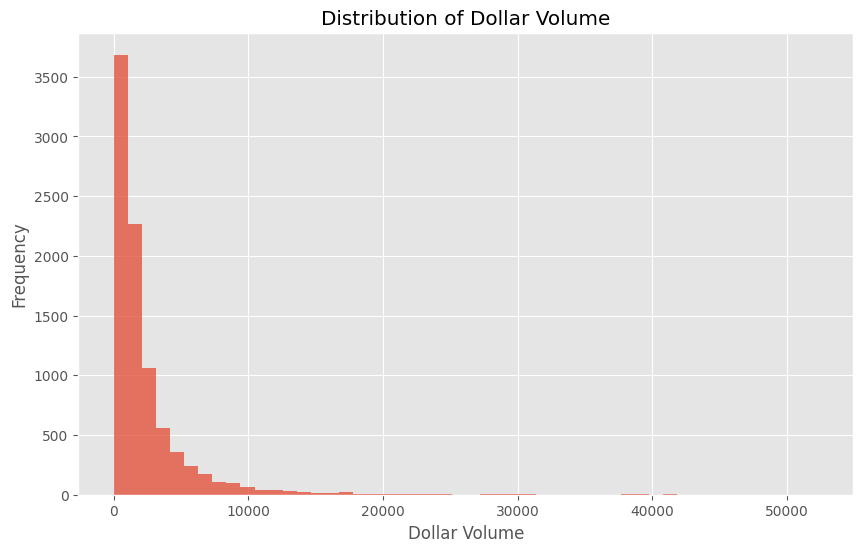

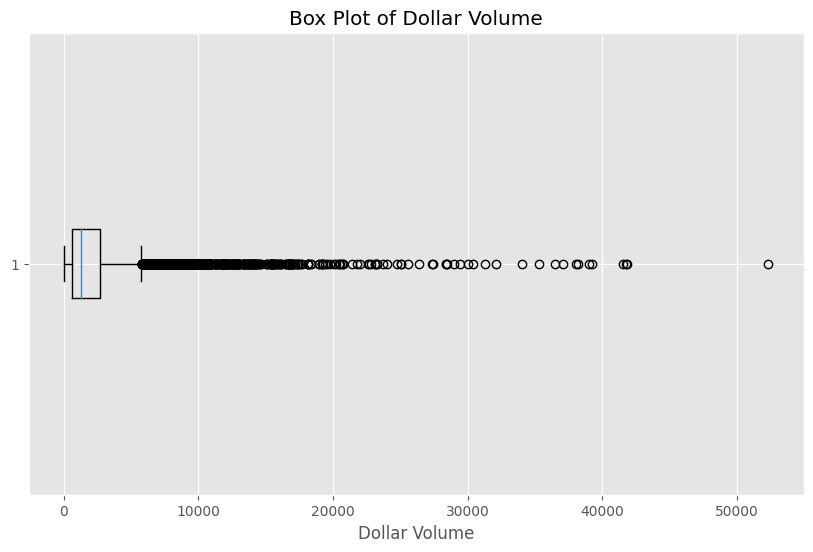

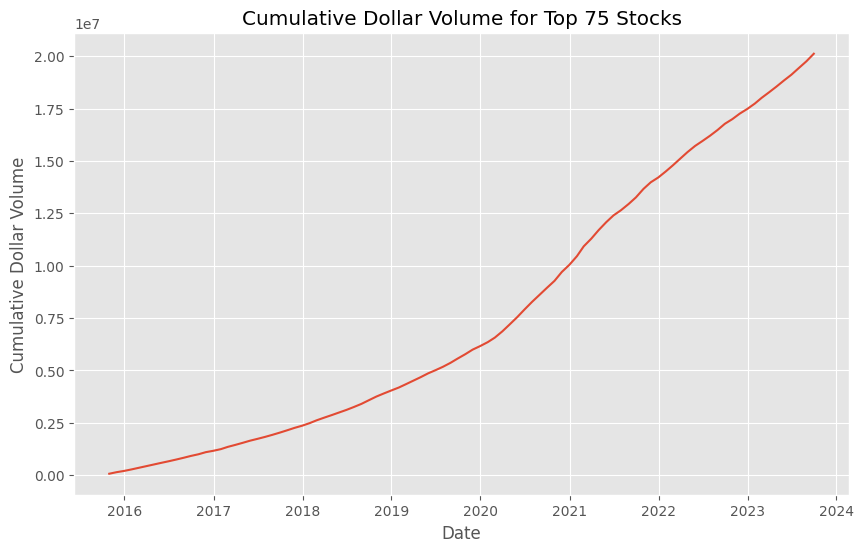

In [ ]:
# Calculate descriptive statistics
descriptive_stats = data['dollar_volume'].describe()
print(descriptive_stats)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['dollar_volume'], bins=50, alpha=0.75)
plt.xlabel('Dollar Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Dollar Volume')
plt.show()

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data['dollar_volume'], vert=False)
plt.xlabel('Dollar Volume')
plt.title('Box Plot of Dollar Volume')
plt.show()

# Rank the 'dollar_volume' for each date
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

# Filter to get top N stocks (e.g., top 75)
top_n = 75
top_n_data = data[data['dollar_vol_rank'] <= top_n]

# Calculate cumulative distribution for top N stocks
cumulative_distribution = top_n_data.groupby('date')['dollar_volume'].sum().cumsum()

# Plot cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(cumulative_distribution)
plt.xlabel('Date')
plt.ylabel('Cumulative Dollar Volume')
plt.title(f'Cumulative Dollar Volume for Top {top_n} Stocks')
plt.show()


In [ ]:
# Calculate the rolling mean of the 'dollar_volume' over a 5-year window (5*12 months) with a minimum of 12 periods
# Unstack the 'ticker' level of the index, apply rolling mean, then stack the 'ticker' level back
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5 * 12, min_periods=12).mean().stack())

# Rank the 'dollar_volume' for each date in descending order
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

# Filter the data to keep only the top 150 ranked dollar volumes per date
# Drop the 'dollar_volume' and 'dollar_vol_rank' columns as they are no longer needed
data = data[data['dollar_vol_rank'] <= 150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                              
2016-09-30 ABB.NS         995.222412 -0.994965  6.946653  6.892887  6.919770   
           ADANIENT.NS     35.046139 -0.670408  3.715351  3.594668  3.655009   
           ADANIPORTS.NS  245.525467 -0.768573  5.596271  5.506127  5.551199   
           ADANIPOWER.NS   24.900000 -0.770582  3.406197  3.279962  3.343079   
           AMBUJACEM.NS   217.991241 -0.379611  5.499311  5.381364  5.440338   
...                              ...       ...       ...       ...       ...   
2023-09-30 VBL.NS         966.730530  1.698510  6.854565  6.787873  6.821219   
           VEDL.NS        209.591141 -1.014162  5.441565  5.347880  5.394722   
           WIPRO.NS       412.021301  0.077410  6.105556  6.003548  6.054552   
           ZOMATO.NS       99.900002 -0.386928  4.642144  4.571229  4.606687   
           ZYDUSLIFE.NS   598.049988  0.857566  6.485703  6.395291  6.440497   

                          garman_klass_vol        rsi  
date       ticker                                      
2016-09-30 ABB.NS                 0.000698  42.162615  
           ADANIENT.NS            0.001050  36.469569  
           ADANIPORTS.NS         -0.000064  48.436454  
           ADANIPOWER.NS          0.000266  33.218416  
           AMBUJACEM.NS          -0.009576  41.075453  
...                                    ...        ...  
2023-09-30 VBL.NS                 0.000753  71.286454  
           VEDL.NS               -0.001820  32.253772  
           WIPRO.NS               0.000024  45.229151  
           ZOMATO.NS              0.000252  59.034982  
           ZYDUSLIFE.NS           0.000092  41.153861  

[7780 rows x 7 columns]

 Calculate Monthly Returns for different time horizons as features.
To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [ ]:
def calculate_returns(df):
    # Define the cutoff for outlier clipping
    outlier_cutoff = 0.005

    # Define a list of lag periods for calculating returns
    lags = [1, 2, 3, 6, 9, 12]

    # Loop through each lag period and calculate the corresponding returns
    for lag in lags:
        # Calculate the percentage change over the lag period
        returns = df['adj close'].pct_change(lag)

        # Clip the returns between specified quantiles to handle outliers
        clipped_returns = returns.clip(lower=returns.quantile(outlier_cutoff),
                                       upper=returns.quantile(1 - outlier_cutoff))

        # Apply the formula to adjust for the clipping and calculate the compounded returns
        adjusted_returns = clipped_returns.add(1).pow(1 / lag).sub(1)

        # Assign the calculated returns to a new column in the DataFrame
        df[f'return_{lag}m'] = adjusted_returns

    return df

# Apply the calculate_returns function to each group in the DataFrame based on the 'ticker' level
# Drop rows with any missing values
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2017-09-30 ABB.NS         1222.994751 -0.528165  7.172288  7.047740  7.110014   
           ADANIENT.NS      62.367619 -0.641226  4.334883  4.127845  4.231364   
           ADANIPORTS.NS   361.466705 -0.634143  5.990572  5.873506  5.932039   
           ADANIPOWER.NS    29.549999 -0.663046  3.534048  3.405278  3.469663   
           AMBUJACEM.NS    233.346024 -0.358324  5.559849  5.433161  5.496505   
...                               ...       ...       ...       ...       ...   
2023-09-30 VBL.NS          966.730530  1.698510  6.854565  6.787873  6.821219   
           VEDL.NS         209.591141 -1.014162  5.441565  5.347880  5.394722   
           WIPRO.NS        412.021301  0.077410  6.105556  6.003548  6.054552   
           ZOMATO.NS        99.900002 -0.386928  4.642144  4.571229  4.606687   
           ZYDUSLIFE.NS    598.049988  0.857566  6.485703  6.395291  6.440497   

                          garman_klass_vol        rsi  return_1m  return_2m  \
date       ticker                                                             
2017-09-30 ABB.NS                -0.000443  49.353402   0.043722  -0.007807   
           ADANIENT.NS            0.000117  41.236487  -0.122595  -0.081651   
           ADANIPORTS.NS         -0.000352  43.499220  -0.041227  -0.024485   
           ADANIPOWER.NS          0.000142  45.280748  -0.113943  -0.060804   
           AMBUJACEM.NS          -0.006908  44.647457  -0.049581   0.009352   
...                                    ...        ...        ...        ...   
2023-09-30 VBL.NS                 0.000753  71.286454   0.075653   0.097540   
           VEDL.NS               -0.001820  32.253772  -0.035730  -0.099115   
           WIPRO.NS               0.000024  45.229151   0.011019   0.009644   
           ZOMATO.NS              0.000252  59.034982   0.023566   0.089895   
           ZYDUSLIFE.NS           0.000092  41.153861  -0.044420  -0.027422   

                          return_3m  return_6m  return_9m  return_12m  
date       ticker                                                      
2017-09-30 ABB.NS         -0.012035   0.015452   0.033432    0.017323  
           ADANIENT.NS    -0.041085   0.012455   0.048184    0.049204  
           ADANIPORTS.NS   0.013535   0.018011   0.038755    0.032756  
           ADANIPOWER.NS  -0.002804  -0.048817  -0.001863    0.014370  
           AMBUJACEM.NS    0.028319   0.021011   0.030131    0.005688  
...                             ...        ...        ...         ...  
2023-09-30 VBL.NS          0.064830   0.057454   0.043625    0.053078  
           VEDL.NS        -0.069406  -0.010814  -0.015752    0.003999  
           WIPRO.NS        0.019943   0.020647   0.005850    0.004065  
           ZOMATO.NS       0.100031   0.118064   0.059333    0.040110  
           ZYDUSLIFE.NS    0.014898   0.036496   0.042257    0.038599  

[6611 rows x 13 columns]

Download Fama-French Factors and Calculate Rolling Factor Betas.
We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [ ]:
# Import the DataReader function from pandas_datareader to fetch data from Fama-French databases
from pandas_datareader import DataReader as web

# Fetch the Fama-French 5 Factors 2x3 dataset from the Fama-French library starting from 2010
factor_data = web('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2010')[0]

# Drop the 'RF' (Risk-Free Rate) column from the dataset
factor_data = factor_data.drop('RF', axis=1)

# Convert the index of factor_data to timestamp format for consistency
factor_data.index = factor_data.index.to_timestamp()

# Resample the data to monthly frequency, taking the last observation for each month
factor_data = factor_data.resample('M').last()

# Divide the factor_data values by 100 to convert percentages to decimal format
factor_data = factor_data.div(100)

# Set the index name of factor_data to 'date' for better clarity
factor_data.index.name = 'date'

# Join the factor_data with the 'return_1m' column from the previously processed data DataFrame
factor_data = factor_data.join(data['return_1m'])

# Sort the index of factor_data for consistency
factor_data = factor_data.sort_index()

# Display the resulting factor_data DataFrame
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2017-09-30 ABB.NS         0.0251  0.0478  0.0314 -0.0147  0.0169   0.043722
           ADANIENT.NS    0.0251  0.0478  0.0314 -0.0147  0.0169  -0.122595
           ADANIPORTS.NS  0.0251  0.0478  0.0314 -0.0147  0.0169  -0.041227
           ADANIPOWER.NS  0.0251  0.0478  0.0314 -0.0147  0.0169  -0.113943
           AMBUJACEM.NS   0.0251  0.0478  0.0314 -0.0147  0.0169  -0.049581
...                          ...     ...     ...     ...     ...        ...
2023-09-30 VBL.NS        -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.075653
           VEDL.NS       -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.035730
           WIPRO.NS      -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.011019
           ZOMATO.NS     -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.023566
           ZYDUSLIFE.NS  -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.044420

[6611 rows x 6 columns]

Filter out stocks with less than 10 months of data.

In [ ]:
# Count the number of observations for each ticker (level 1) in the factor_data DataFrame
observations = factor_data.groupby(level=1).size()

# Filter out tickers with fewer than 10 observations and keep only valid stocks
valid_stocks = observations[observations >= 10]

# Filter factor_data to keep only the tickers present in valid_stocks
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

# Display the resulting factor_data DataFrame with valid stocks
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2017-09-30 ABB.NS         0.0251  0.0478  0.0314 -0.0147  0.0169   0.043722
           ADANIENT.NS    0.0251  0.0478  0.0314 -0.0147  0.0169  -0.122595
           ADANIPORTS.NS  0.0251  0.0478  0.0314 -0.0147  0.0169  -0.041227
           ADANIPOWER.NS  0.0251  0.0478  0.0314 -0.0147  0.0169  -0.113943
           AMBUJACEM.NS   0.0251  0.0478  0.0314 -0.0147  0.0169  -0.049581
...                          ...     ...     ...     ...     ...        ...
2023-09-30 ULTRACEMCO.NS -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.008262
           VBL.NS        -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.075653
           VEDL.NS       -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.035730
           WIPRO.NS      -0.0524 -0.0181  0.0151  0.0187 -0.0082   0.011019
           ZYDUSLIFE.NS  -0.0524 -0.0181  0.0151  0.0187 -0.0082  -0.044420

[6599 rows x 6 columns]

Calculate Rolling Factor Betas.

In [ ]:
# Define a lambda function to calculate rolling betas using RollingOLS from statsmodels
betas = (factor_data.groupby(level=1, group_keys=False)  # Group by ticker (level 1) without adding group keys
         .apply(lambda x:
                RollingOLS(endog=x['return_1m'],  # Endogenous variable is 'return_1m'
                           exog=sm.add_constant(x.drop('return_1m', axis=1)),  # Exogenous variables with constant term added
                           window=min(24, x.shape[0]),  # Rolling window size, minimum of 24 or length of data
                           min_nobs=len(x.columns) + 1)  # Minimum number of observations required
                .fit(params_only=True)  # Fit the RollingOLS model and extract only the parameters
                .params  # Extract the parameters (coefficients)
                .drop('const', axis=1)))  # Drop the constant term from the parameters

# Display the resulting betas DataFrame containing rolling betas for each ticker
betas


Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2017-09-30 ABB.NS              NaN       NaN       NaN       NaN       NaN
           ADANIENT.NS         NaN       NaN       NaN       NaN       NaN
           ADANIPORTS.NS       NaN       NaN       NaN       NaN       NaN
           ADANIPOWER.NS       NaN       NaN       NaN       NaN       NaN
           AMBUJACEM.NS        NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-09-30 ULTRACEMCO.NS  0.660866 -0.131055 -0.060459  0.146518 -0.240937
           VBL.NS        -0.674057 -0.037563 -0.469471  0.630133 -0.090189
           VEDL.NS        1.214538  0.265566 -1.245404 -0.760227  2.045267
           WIPRO.NS       0.678916  0.149676 -0.662563 -0.000456  0.582792
           ZYDUSLIFE.NS   0.322709  1.038307 -0.427417 -0.008645  0.610190

[6599 rows x 5 columns]

Join the rolling factors data to the main features dataframe.

In [ ]:
# Define the list of factor names
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

# Join the 'betas' DataFrame with the 'data' DataFrame, shifting the betas by one period
data = data.join(betas.groupby('ticker').shift())

# Fill missing values in the specified factors by group (ticker) with the group mean
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

# Drop the 'adj close' column from the DataFrame
data = data.drop('adj close', axis=1)

# Drop rows with any missing values
data = data.dropna()

# Display information about the resulting DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6556 entries, (Timestamp('2017-09-30 00:00:00'), 'ABB.NS') to (Timestamp('2023-09-30 00:00:00'), 'ZYDUSLIFE.NS')
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               6556 non-null   float64
 1   bb_high           6556 non-null   float64
 2   bb_low            6556 non-null   float64
 3   bb_mid            6556 non-null   float64
 4   garman_klass_vol  6556 non-null   float64
 5   rsi               6556 non-null   float64
 6   return_1m         6556 non-null   float64
 7   return_2m         6556 non-null   float64
 8   return_3m         6556 non-null   float64
 9   return_6m         6556 non-null   float64
 10  return_9m         6556 non-null   float64
 11  return_12m        6556 non-null   float64
 12  Mkt-RF            6556 non-null   float64
 13  SMB               6556 non-null   float64
 14  HML               6556 non-null   float64
 15  

At this point we have to decide on what ML model and approach to use for predictions etc.

For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
K-Means Clustering
You may want to initialize predefined centroids for each cluster based on your research.

For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

Then we will pre-define our centroids for each cluster.

In [ ]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Drop the 'cluster' column from the DataFrame if it exists
#data = data.drop('cluster', axis=1)

# Define a function to assign clusters to the data points using KMeans clustering
def get_clusters(df):
    # Apply KMeans clustering with 4 clusters, using initial centroids defined earlier
    df['cluster'] = KMeans(n_clusters=4,  # Number of clusters
                           random_state=0,  # Random state for reproducibility
                           init=initial_centroids  # Initial centroids
                           ).fit(df).labels_  # Fit KMeans to the data and assign cluster labels
    return df

# Drop rows with any missing values, group the data by 'date', and apply the get_clusters function to each group
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

# Display the resulting DataFrame with cluster assignments
data


atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2017-09-30 ABB.NS        -0.528165  7.172288  7.047740  7.110014   
           ADANIENT.NS   -0.641226  4.334883  4.127845  4.231364   
           ADANIPORTS.NS -0.634143  5.990572  5.873506  5.932039   
           ADANIPOWER.NS -0.663046  3.534048  3.405278  3.469663   
           AMBUJACEM.NS  -0.358324  5.559849  5.433161  5.496505   
...                            ...       ...       ...       ...   
2023-09-30 ULTRACEMCO.NS  0.397554  9.080296  8.999038  9.039667   
           VBL.NS         1.698510  6.854565  6.787873  6.821219   
           VEDL.NS       -1.014162  5.441565  5.347880  5.394722   
           WIPRO.NS       0.077410  6.105556  6.003548  6.054552   
           ZYDUSLIFE.NS   0.857566  6.485703  6.395291  6.440497   

                          garman_klass_vol        rsi  return_1m  return_2m  \
date       ticker                                                             
2017-09-30 ABB.NS                -0.000443  49.353402   0.043722  -0.007807   
           ADANIENT.NS            0.000117  41.236487  -0.122595  -0.081651   
           ADANIPORTS.NS         -0.000352  43.499220  -0.041227  -0.024485   
           ADANIPOWER.NS          0.000142  45.280748  -0.113943  -0.060804   
           AMBUJACEM.NS          -0.006908  44.647457  -0.049581   0.009352   
...                                    ...        ...        ...        ...   
2023-09-30 ULTRACEMCO.NS          0.000108  46.307193  -0.008262  -0.005379   
           VBL.NS                 0.000753  71.286454   0.075653   0.097540   
           VEDL.NS               -0.001820  32.253772  -0.035730  -0.099115   
           WIPRO.NS               0.000024  45.229151   0.011019   0.009644   
           ZYDUSLIFE.NS           0.000092  41.153861  -0.044420  -0.027422   

                          return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                       
2017-09-30 ABB.NS         -0.012035   0.015452   0.033432    0.017323   
           ADANIENT.NS    -0.041085   0.012455   0.048184    0.049204   
           ADANIPORTS.NS   0.013535   0.018011   0.038755    0.032756   
           ADANIPOWER.NS  -0.002804  -0.048817  -0.001863    0.014370   
           AMBUJACEM.NS    0.028319   0.021011   0.030131    0.005688   
...                             ...        ...        ...         ...   
2023-09-30 ULTRACEMCO.NS  -0.001136   0.013618   0.019314    0.023507   
           VBL.NS          0.064830   0.057454   0.043625    0.053078   
           VEDL.NS        -0.069406  -0.010814  -0.015752    0.003999   
           WIPRO.NS        0.019943   0.020647   0.005850    0.004065   
           ZYDUSLIFE.NS    0.014898   0.036496   0.042257    0.038599   

                            Mkt-RF       SMB       HML       RMW       CMA  \
date       ticker                                                            
2017-09-30 ABB.NS         0.675510 -0.134160  0.664984 -0.610676  0.211280   
           ADANIENT.NS    0.288205  0.035892  0.401273  2.225410 -0.898034   
           ADANIPORTS.NS  0.230319  0.511807  0.494104  0.842948 -0.626274   
           ADANIPOWER.NS  0.685218 -1.383359  1.023125  0.435450  1.599916   
           AMBUJACEM.NS  -0.012220 -0.310808  0.486995  0.397185 -1.072720   
...                            ...       ...       ...       ...       ...   
2023-09-30 ULTRACEMCO.NS  0.680767 -0.107469 -0.119225  0.167809 -0.175935   
           VBL.NS        -0.693946 -0.061107 -0.410708  0.608752 -0.155134   
           VEDL.NS        1.248215  0.342020 -1.304457 -0.858921  2.179893   
           WIPRO.NS       0.724951  0.252370 -0.745287 -0.128680  0.765592   
           ZYDUSLIFE.NS   0.316592  1.025347 -0.415667  0.005865  0.586362   

                          cluster  
date       ticker                  
2017-09-30 ABB.NS               3  
           ADANIENT.NS          0  
         

In [ ]:
import matplotlib.pyplot as plt  # Importing the required library for plotting

# Define a function to plot clusters based on data points in the 'data' DataFrame
def plot_clusters(data):
    # Separate data points for each cluster
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    # Plotting clusters using scatter plot
    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 5], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 5], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 5], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 5], color='black', label='cluster 3')

    # Adding legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

    return

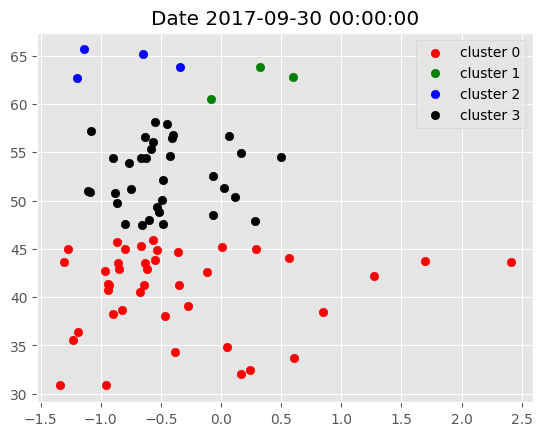

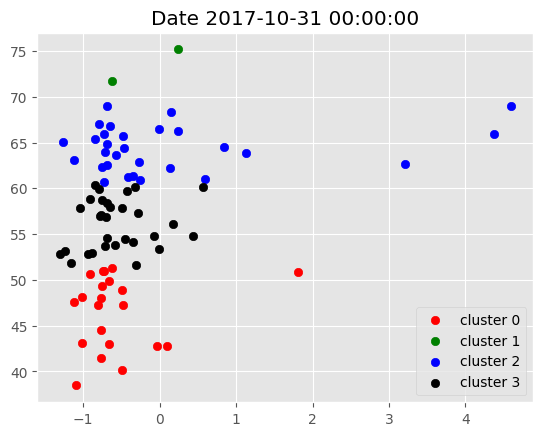

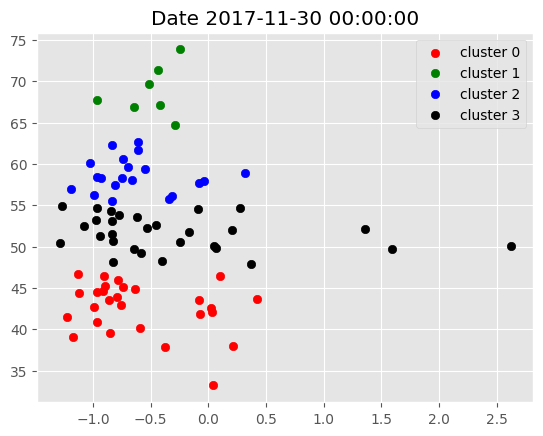

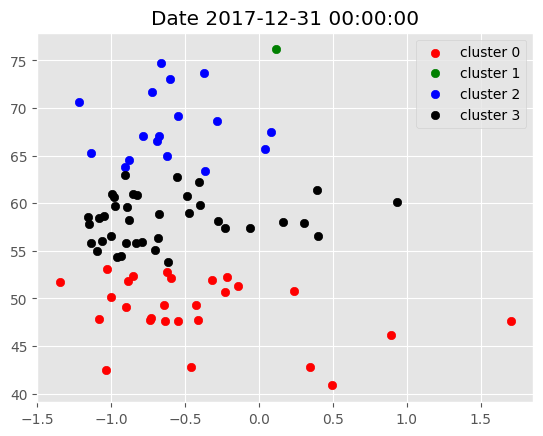

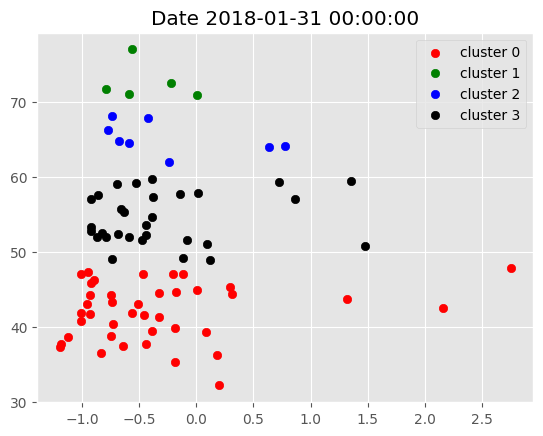

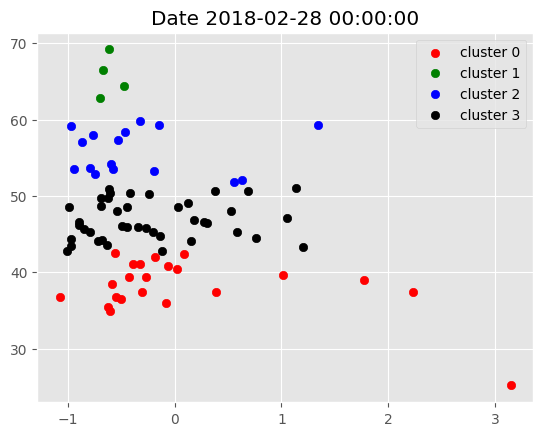

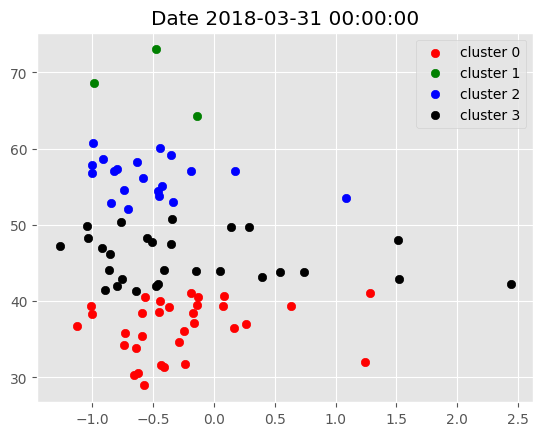

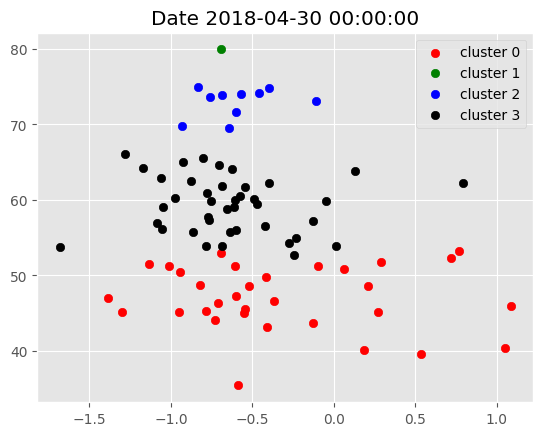

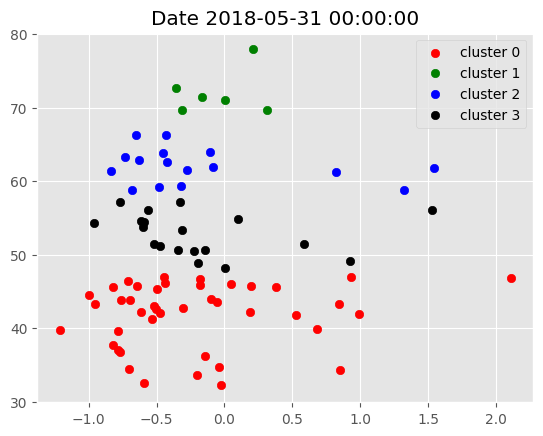

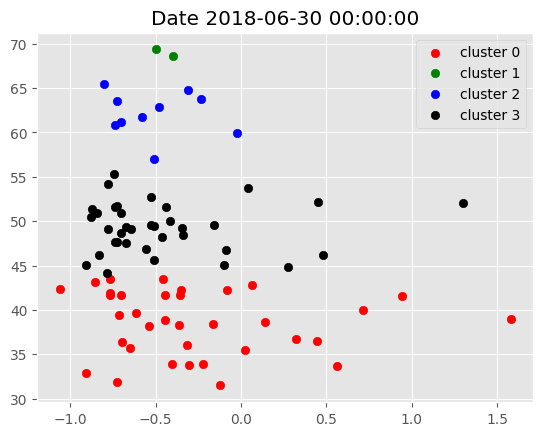

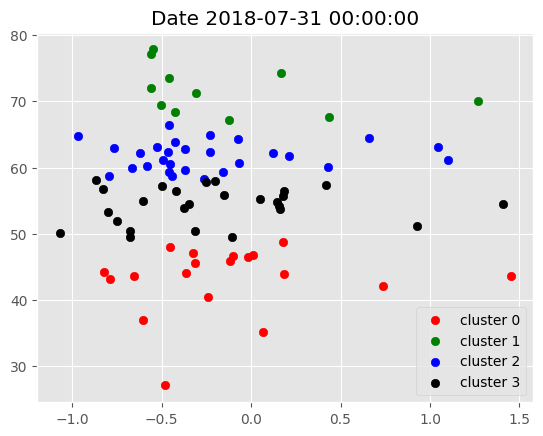

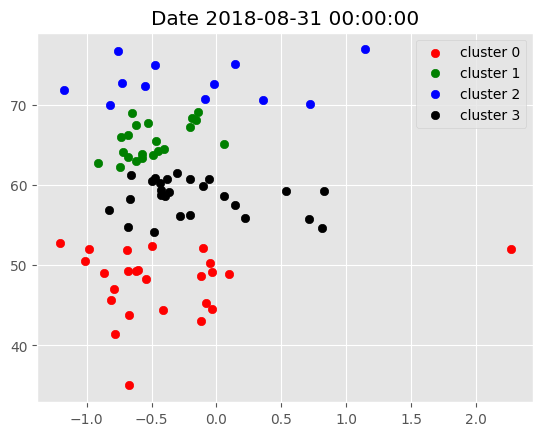

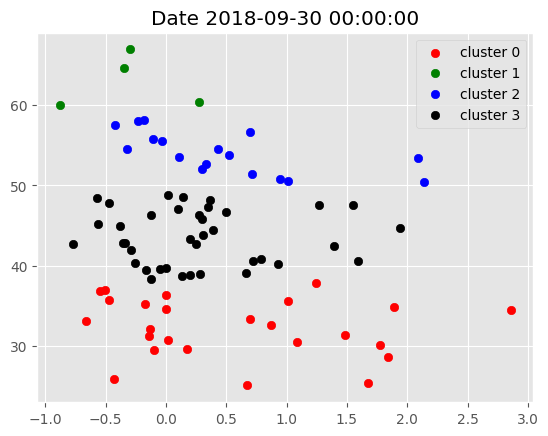

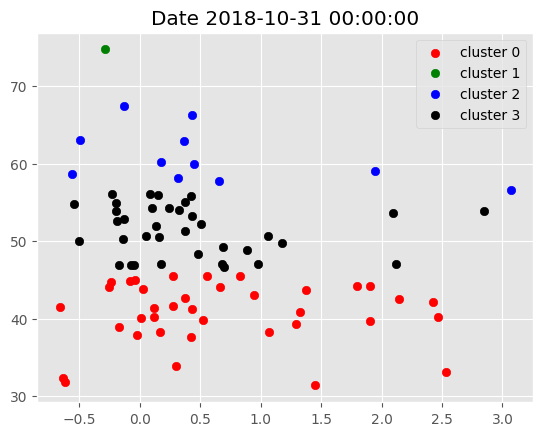

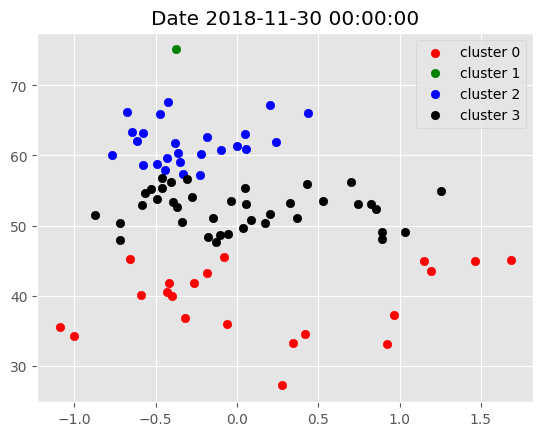

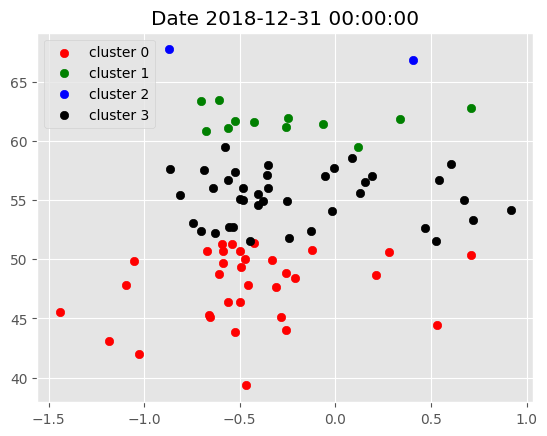

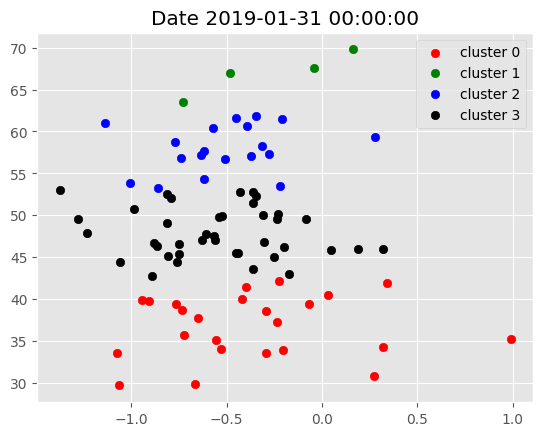

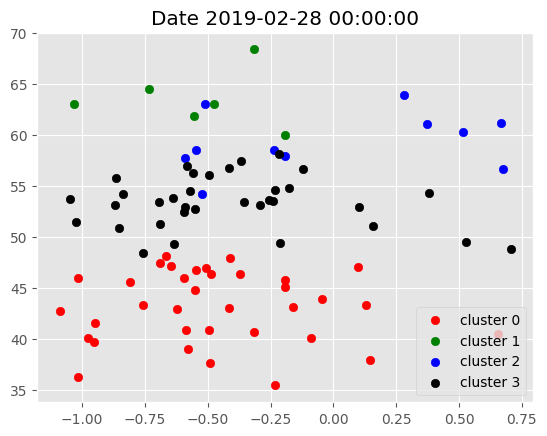

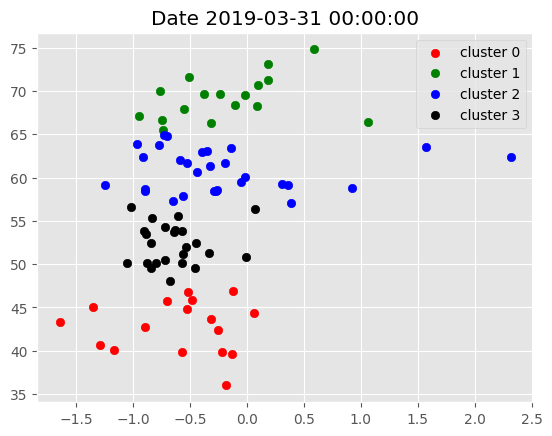

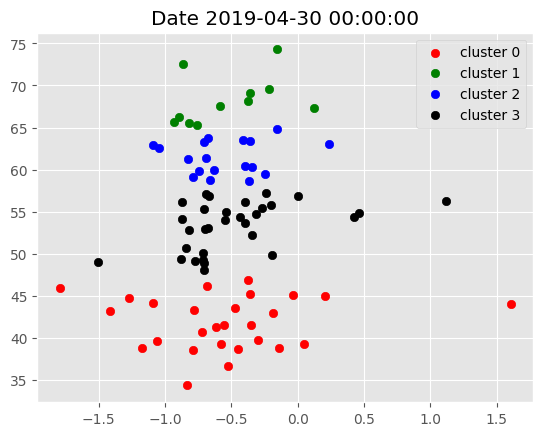

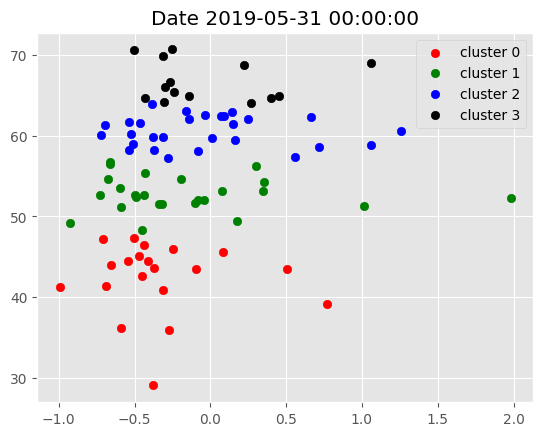

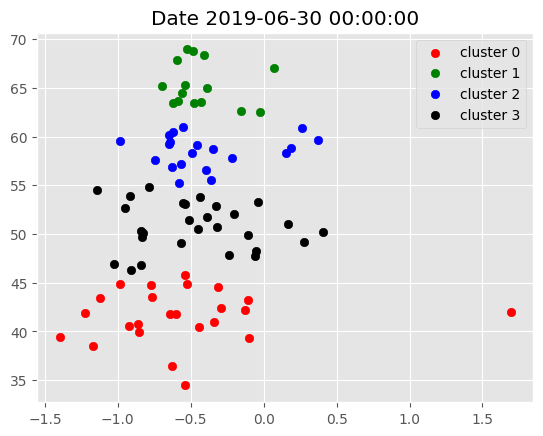

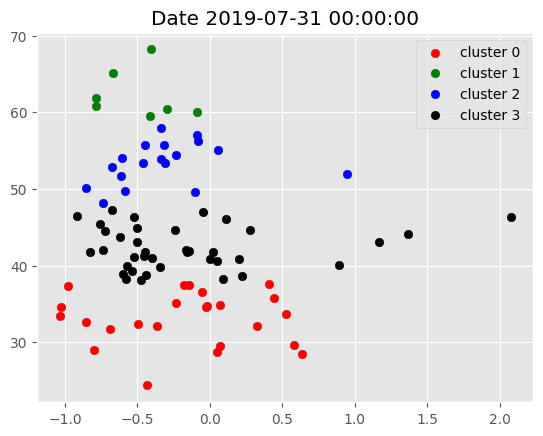

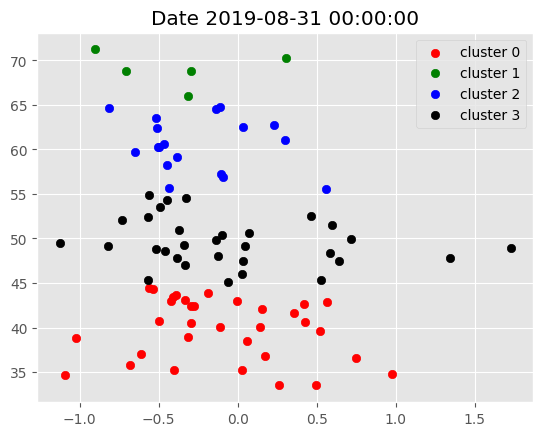

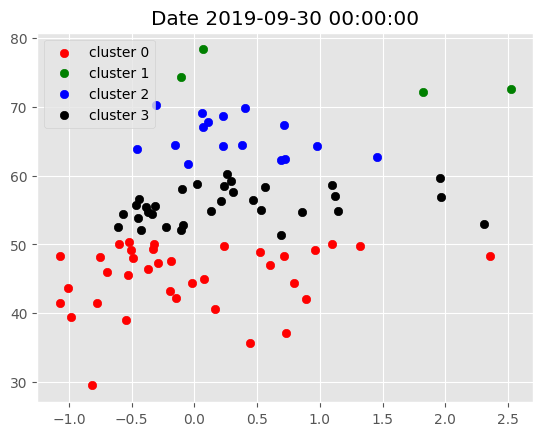

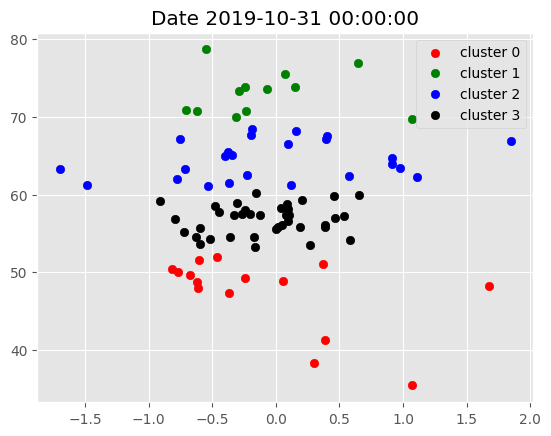

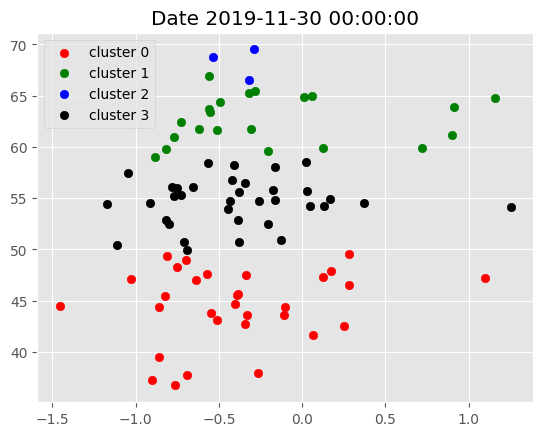

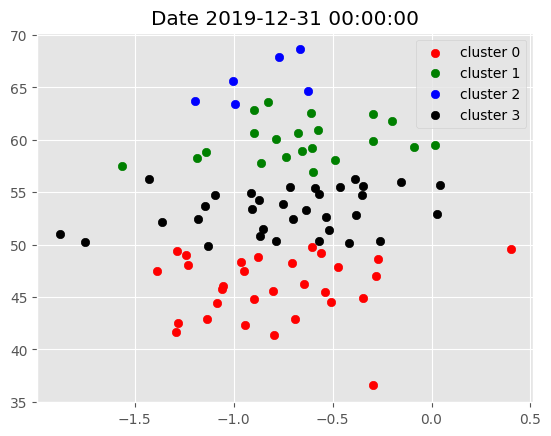

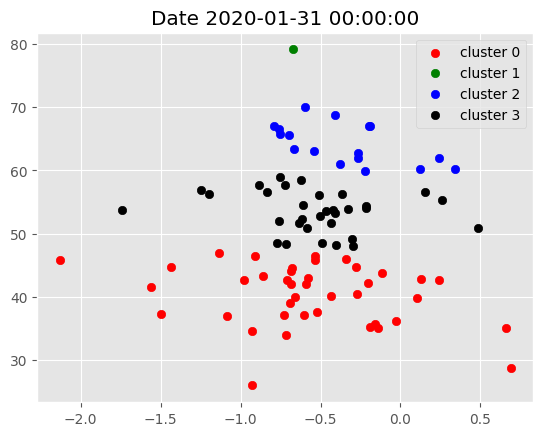

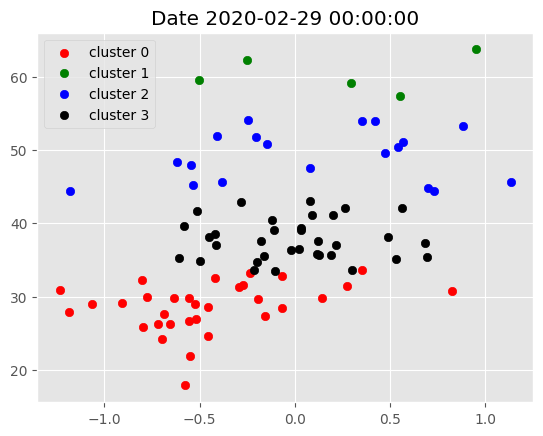

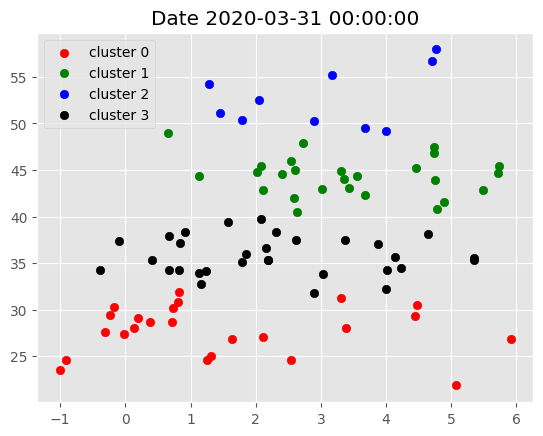

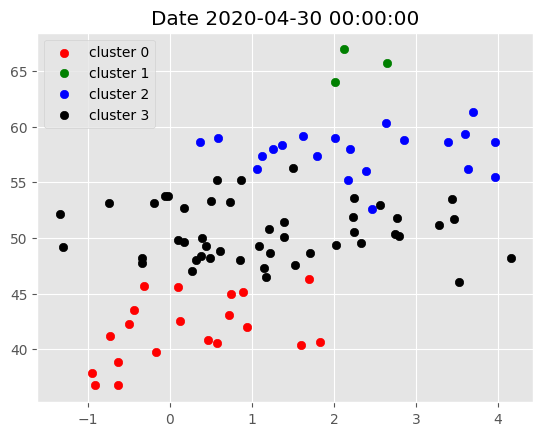

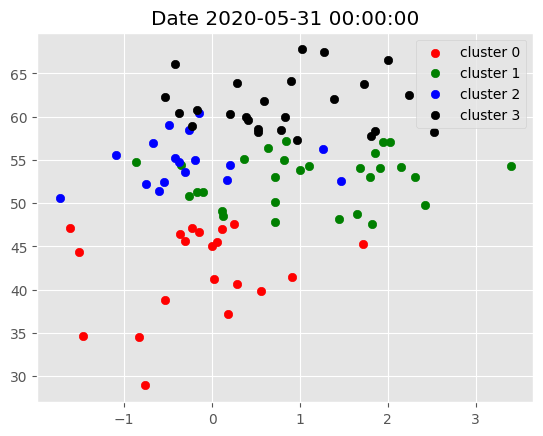

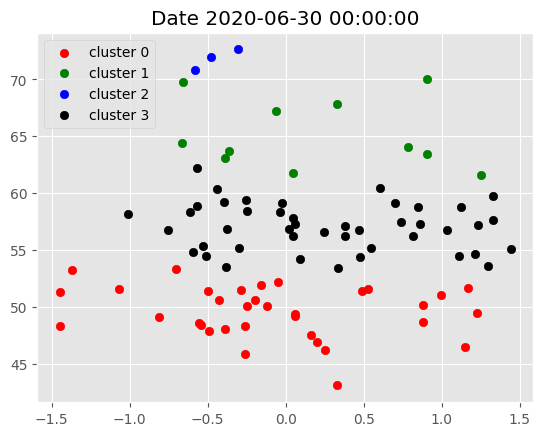

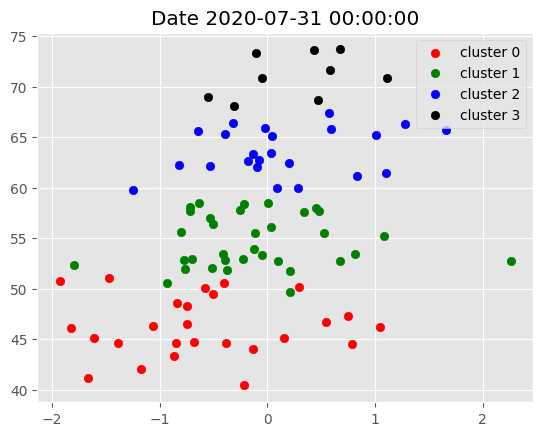

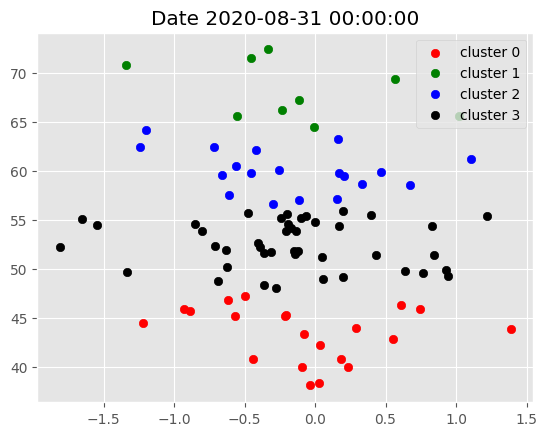

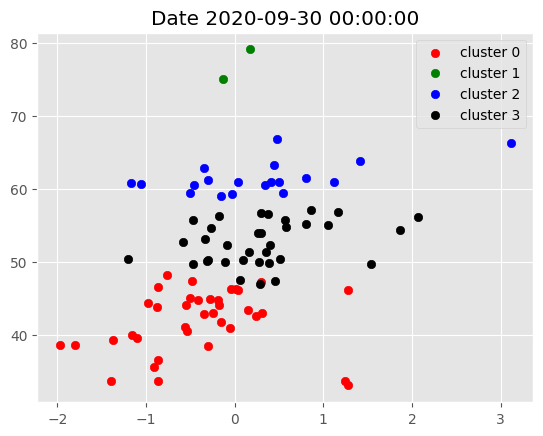

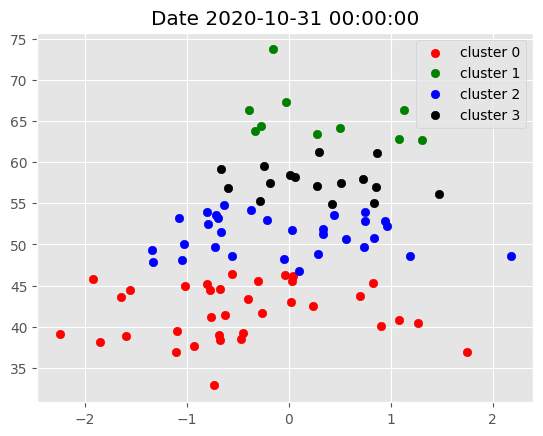

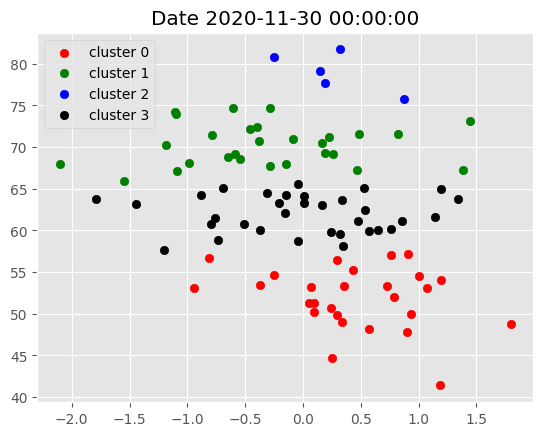

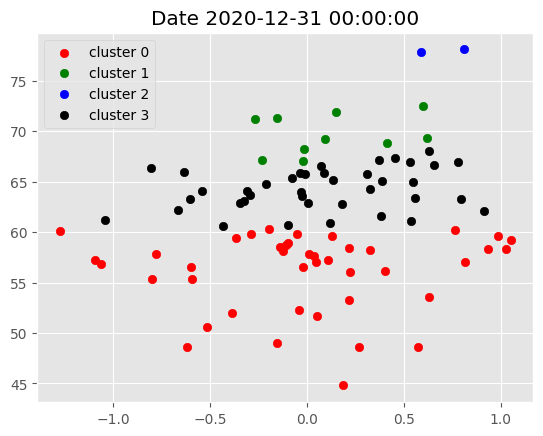

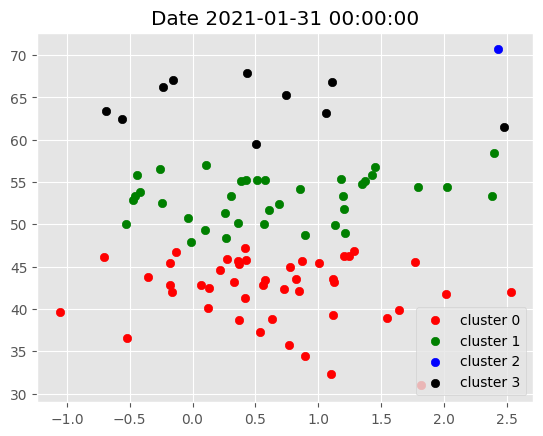

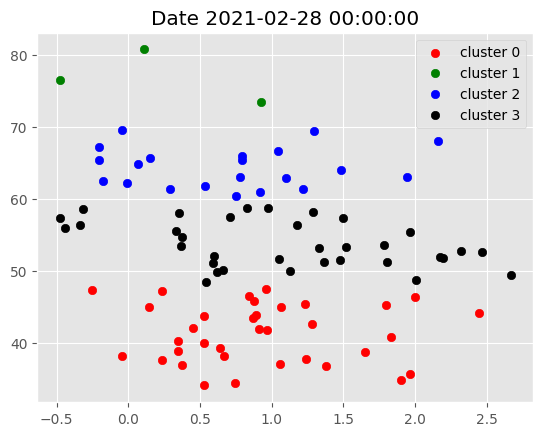

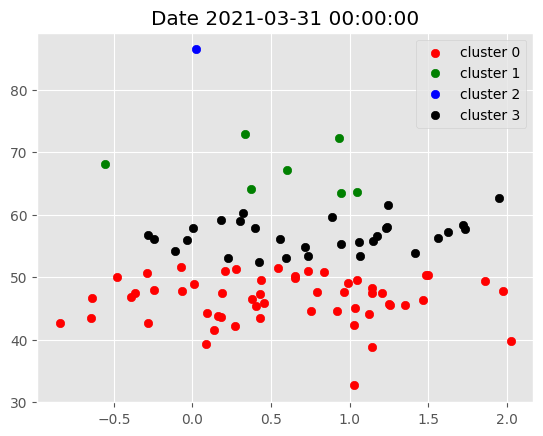

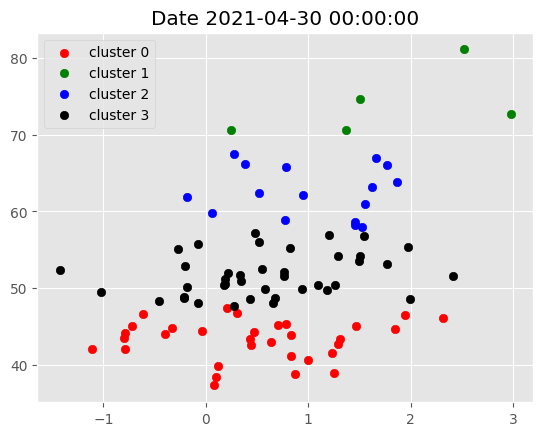

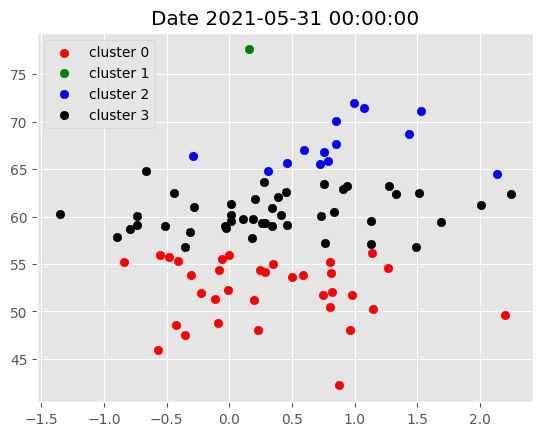

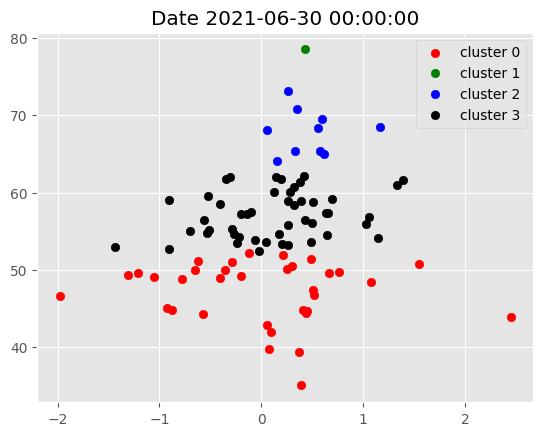

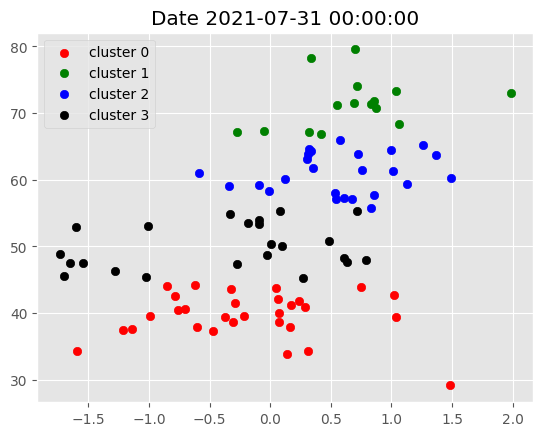

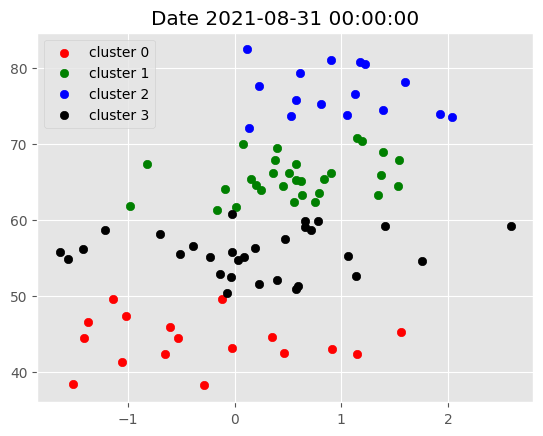

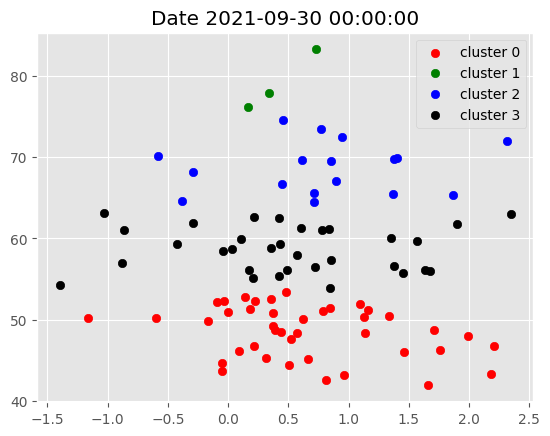

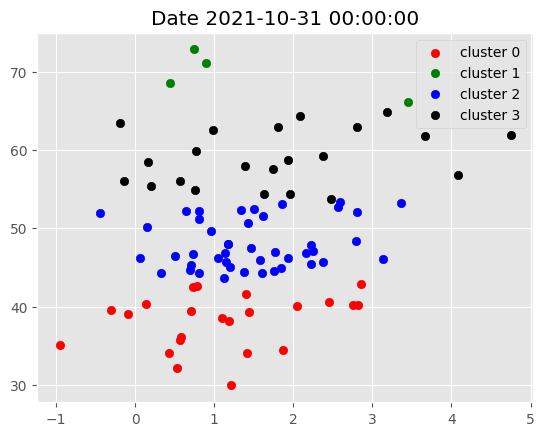

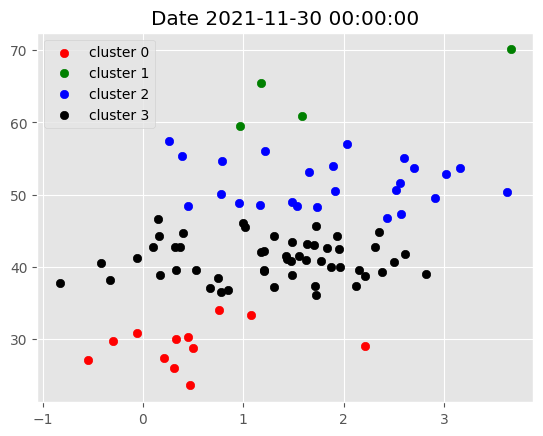

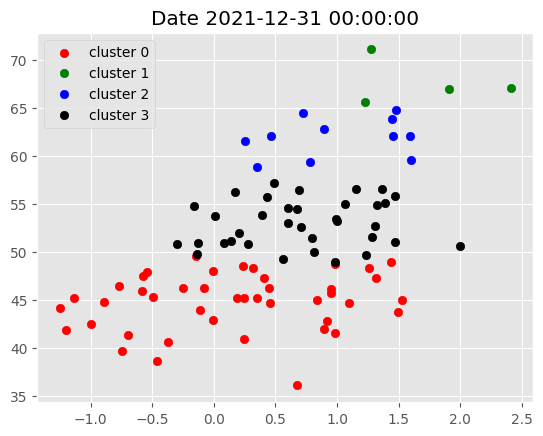

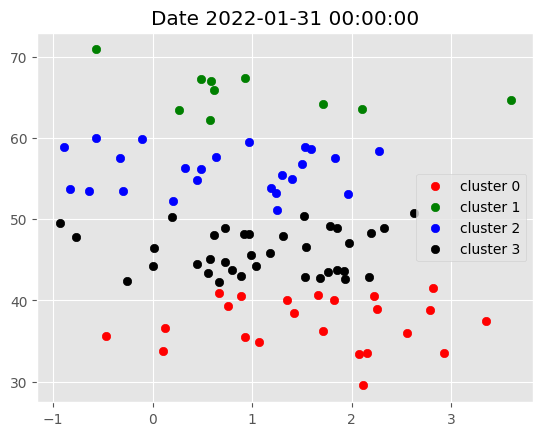

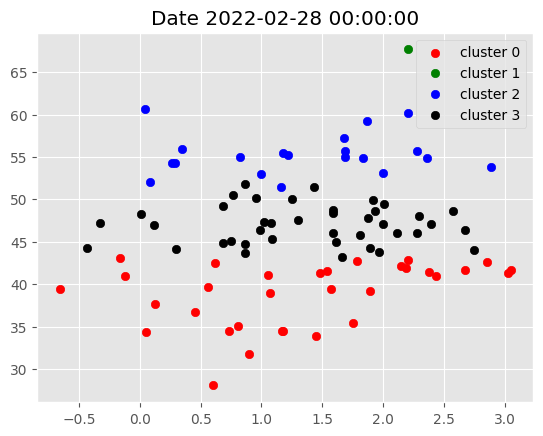

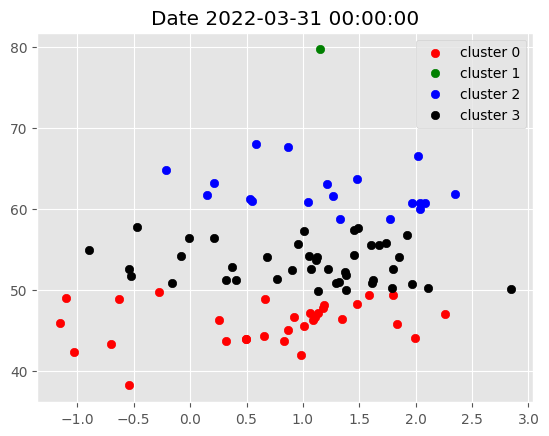

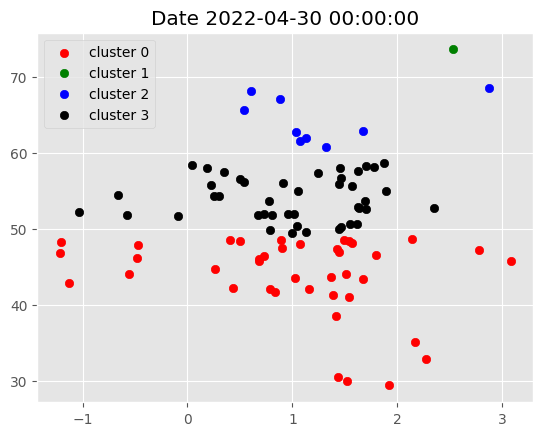

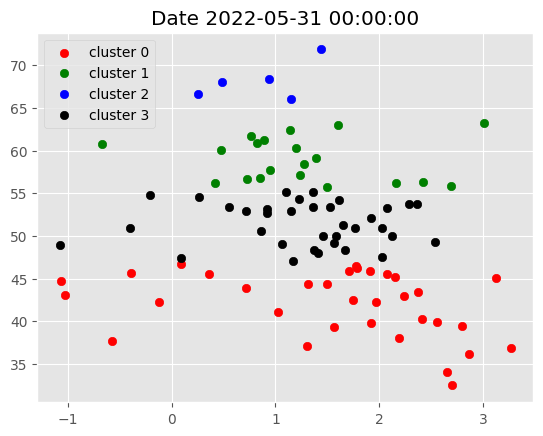

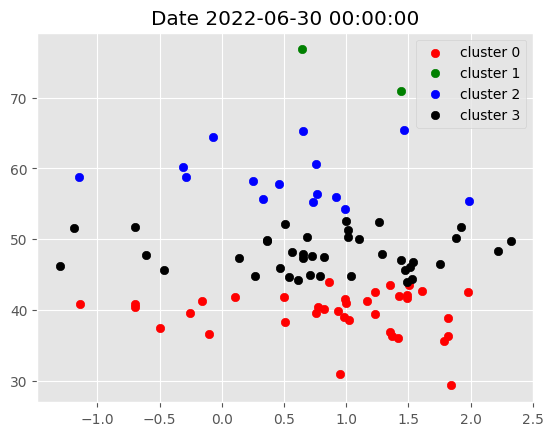

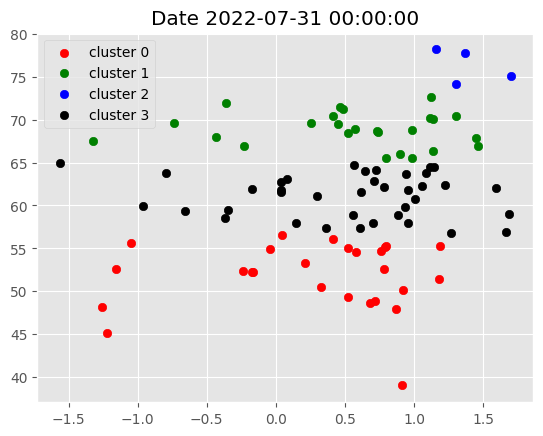

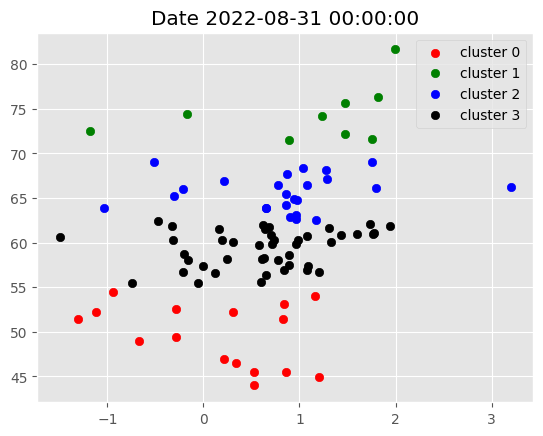

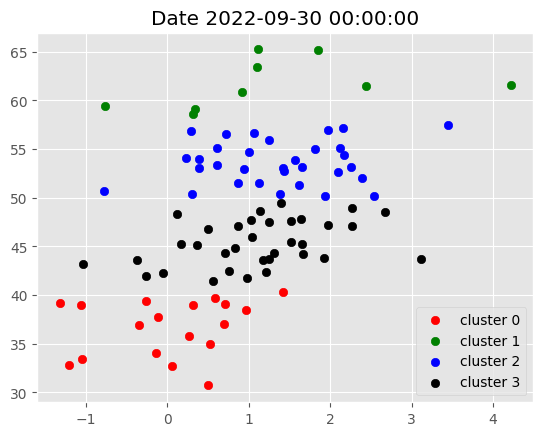

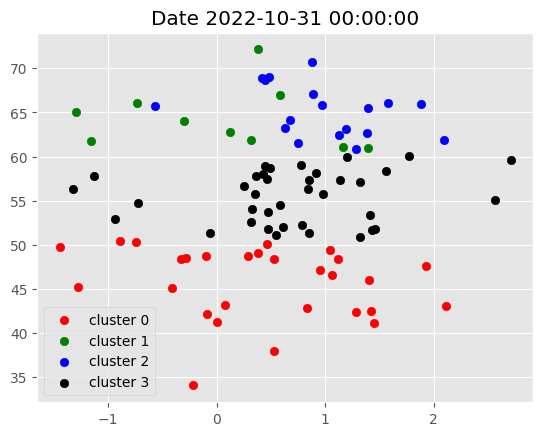

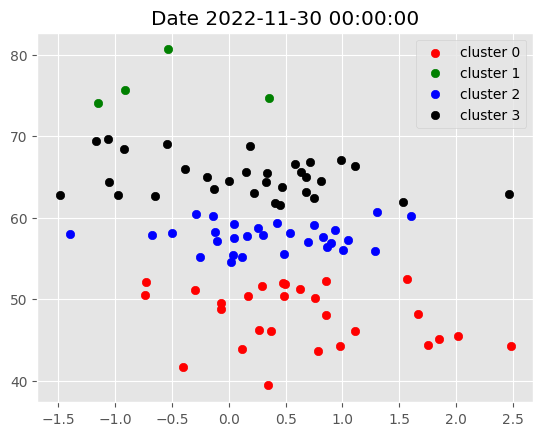

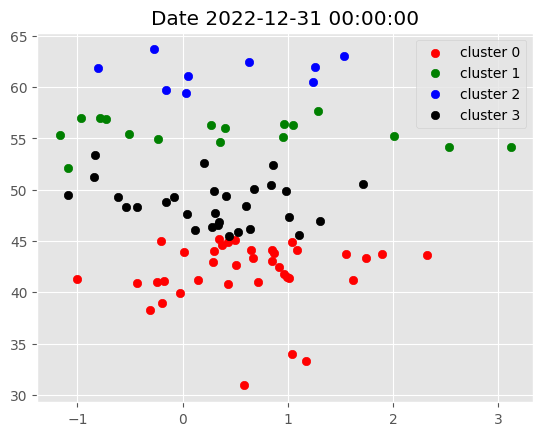

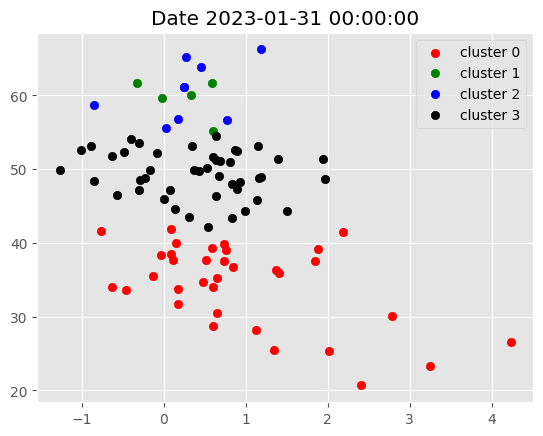

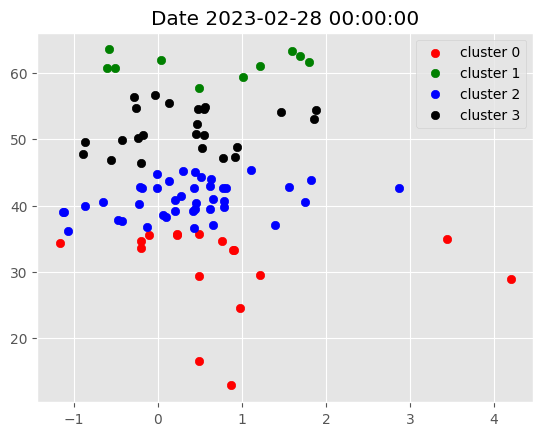

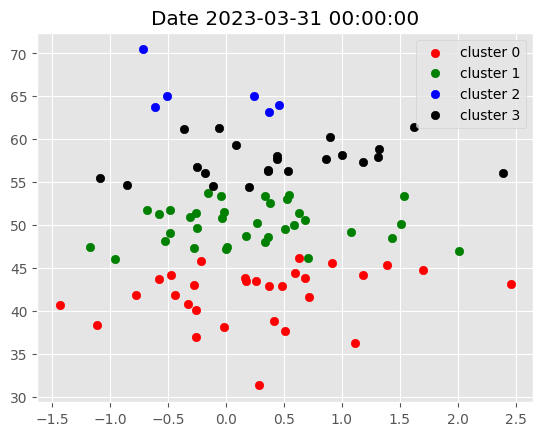

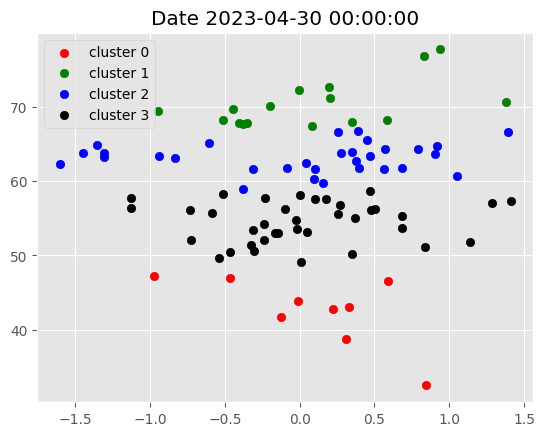

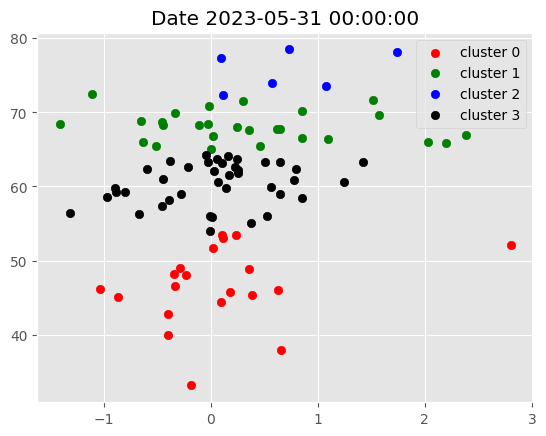

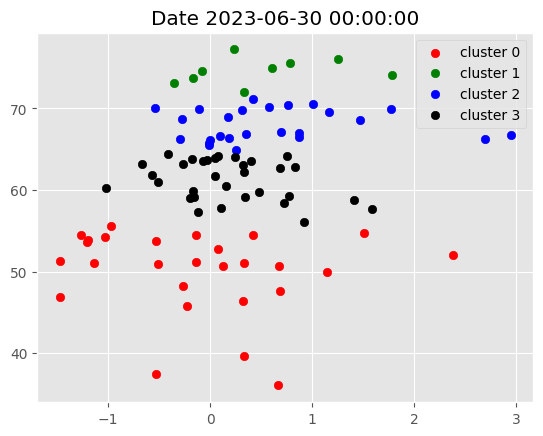

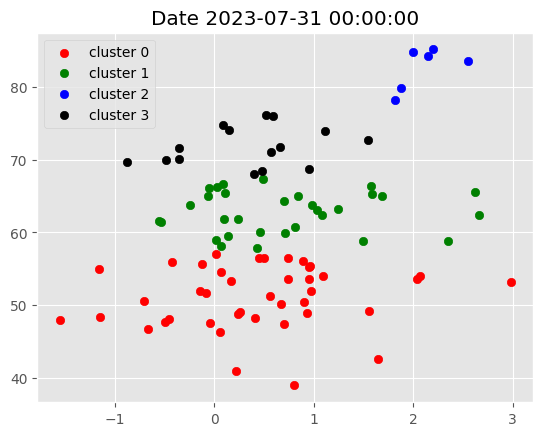

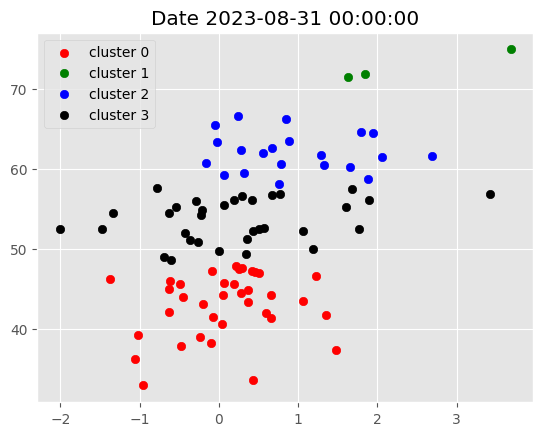

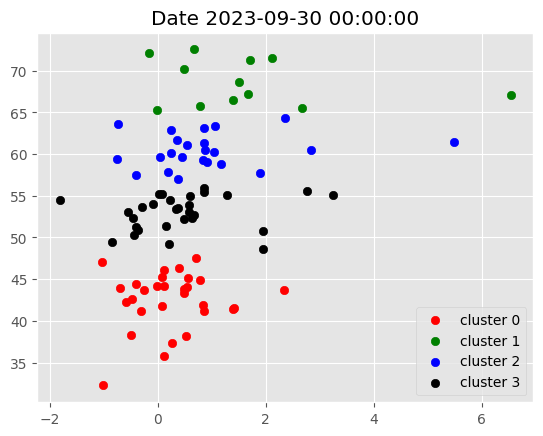

In [ ]:
# Set the 'ggplot' style for matplotlib plots
plt.style.use('ggplot')

# Iterate through unique dates in the multi-level index of the 'data' DataFrame
for date in data.index.get_level_values('date').unique().tolist():
    # Extract the subset of data for the current date
    subset_data = data.xs(date, level=0)

    # Set the plot title with the current date
    plt.title(f'Date {date}')

    # Plot clusters for the current subset of data using the plot_clusters function
    plot_clusters(subset_data)


Apply pre-defined centroids.

In [ ]:
# Define the target RSI values for clustering
target_rsi_values = [30, 45, 55, 70]

# Create an array to store the initial centroids with shape (number of target RSI values, number of features)
initial_centroids = np.zeros((len(target_rsi_values), 17))

# Set the RSI column in each initial centroid to the corresponding target RSI value
initial_centroids[:, 6] = target_rsi_values

# Display the resulting initial centroids array
initial_centroids


array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [ ]:
# Filter the 'data' DataFrame to include rows where the 'cluster' column has a value of 3
filtered_df = data[data['cluster'] == 3].copy()

# Reset the index of the filtered DataFrame to default integer index, keeping the date in a separate column
filtered_df = filtered_df.reset_index(level=1)

# Add one day to each date in the index
filtered_df.index = filtered_df.index + pd.DateOffset(1)

# Reset the index to default integer index and set a multi-level index using 'date' and 'ticker' columns
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

# Get unique dates from the index of the filtered DataFrame
dates = filtered_df.index.get_level_values('date').unique().tolist()

# Create a dictionary to store fixed dates and associated tickers
fixed_dates = {}

# Iterate through unique dates in the index
for date in dates:
    # Extract the subset of data for the current date
    subset_data = filtered_df.xs(date, level=0)

    # Store the list of tickers associated with the current date in the dictionary
    fixed_dates[date.strftime('%Y-%m-%d')] = subset_data.index.tolist()

# Display the dictionary with fixed dates and associated tickers
fixed_dates


{'2017-10-01': ['ABB.NS',
  'AXISBANK.NS',
  'BAJAJHLDNG.NS',
  'BAJFINANCE.NS',
  'CIPLA.NS',
  'DABUR.NS',
  'DIVISLAB.NS',
  'DRREDDY.NS',
  'EICHERMOT.NS',
  'GODREJCP.NS',
  'GRASIM.NS',
  'HAVELLS.NS',
  'HCLTECH.NS',
  'HDFCBANK.NS',
  'HINDALCO.NS',
  'INDUSINDBK.NS',
  'JSWSTEEL.NS',
  'KOTAKBANK.NS',
  'MARUTI.NS',
  'MOTHERSON.NS',
  'NAUKRI.NS',
  'NESTLEIND.NS',
  'NTPC.NS',
  'POWERGRID.NS',
  'SHREECEM.NS',
  'SHRIRAMFIN.NS',
  'SRF.NS',
  'SUNPHARMA.NS',
  'TATACONSUM.NS',
  'TATAMOTORS.NS',
  'TATASTEEL.NS',
  'TORNTPHARM.NS',
  'TRENT.NS',
  'VEDL.NS'],
 '2017-11-01': ['ADANIENT.NS',
  'ADANIPOWER.NS',
  'AMBUJACEM.NS',
  'AXISBANK.NS',
  'BERGEPAINT.NS',
  'CHOLAFIN.NS',
  'DIVISLAB.NS',
  'DRREDDY.NS',
  'EICHERMOT.NS',
  'HEROMOTOCO.NS',
  'HINDALCO.NS',
  'ICICIBANK.NS',
  'INFY.NS',
  'JINDALSTEL.NS',
  'JSWSTEEL.NS',
  'M&M.NS',
  'NAUKRI.NS',
  'NESTLEIND.NS',
  'PFC.NS',
  'POWERGRID.NS',
  'SHREECEM.NS',
  'SRF.NS',
  'SUNPHARMA.NS',
  'TATAMOTORS.NS',
  'TAT

Define portfolio optimization function
We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [ ]:
# Import necessary modules from PyPortfolioOpt library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Define a function to optimize portfolio weights based on historical asset prices
def optimize_weights(prices, lower_bound=0):
    # Calculate historical expected returns using mean historical return method
    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)

    # Calculate covariance matrix using sample covariance method
    cov = risk_models.sample_cov(prices=prices, frequency=252)

    # Initialize EfficientFrontier object with expected returns, covariance matrix, and weight bounds
    ef = EfficientFrontier(expected_returns=returns, cov_matrix=cov, weight_bounds=(lower_bound, 0.1), solver='SCS')

    # Maximize Sharpe ratio to get optimal portfolio weights
    weights = ef.max_sharpe()

    # Clean the weights (rounding near-zero weights to zero)
    cleaned_weights = ef.clean_weights()

    return cleaned_weights


Download Fresh Daily Prices Data only for short listed stocks.

In [ ]:
# Extract unique ticker symbols from the index and convert them into a list
stocks = data.index.get_level_values('ticker').unique().tolist()

# Download historical stock data for the list of ticker symbols
# Start date is set to one year (12 months) before the earliest date in the dataset
# End date is set to the latest date in the dataset
new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

# Display or use the downloaded stock data stored in 'new_df' DataFrame
new_df


[*********************100%%**********************]  93 of 93 completed


Price         Adj Close                                           \
Ticker           ABB.NS  ADANIENT.NS ADANIGREEN.NS ADANIPORTS.NS   
Date                                                               
2016-09-30   995.222412    35.046139           NaN    245.525497   
2016-10-03  1019.451599    35.739590           NaN    252.936676   
2016-10-04  1021.804688    36.273026           NaN    256.953033   
2016-10-05  1020.889648    36.086327           NaN    253.845184   
2016-10-06  1019.930786    35.606232           NaN    253.319183   
...                 ...          ...           ...           ...   
2023-09-25  4162.023438  2481.099609   1013.799988    822.122742   
2023-09-26  4190.223145  2456.959229   1012.299988    817.841064   
2023-09-27  4218.272949  2482.299072   1018.750000    827.151123   
2023-09-28  4087.091797  2474.252197   1012.450012    819.583557   
2023-09-29  4083.653809  2412.926758    987.150024    821.624878   

Price                                                                          \
Ticker     ADANIPOWER.NS AMBUJACEM.NS APOLLOHOSP.NS ASIANPAINT.NS     ATGL.NS   
Date                                                                            
2016-09-30     24.900000   217.991272   1278.780640   1094.700439         NaN   
2016-10-03     25.650000   224.182449   1307.600342   1125.164185         NaN   
2016-10-04     25.750000   221.801224   1321.377563   1124.739502         NaN   
2016-10-05     25.700001   221.801224   1308.379272   1140.017822         NaN   
2016-10-06     25.400000   218.770569   1303.559570   1140.725708         NaN   
...                  ...          ...           ...           ...         ...   
2023-09-25    381.149994   421.627136   5092.456055   3285.668457  634.132324   
2023-09-26    377.500000   428.456543   5049.145508   3255.562744  633.932373   
2023-09-27    375.350006   429.154449   5100.748535   3264.460938  627.484131   
2023-09-28    375.399994   418.636169   5015.575684   3134.497559  621.985535   
2023-09-29    377.450012   423.521423   5133.119629   3125.302490  613.087891   

Price                    ...   Volume                                  \
Ticker      AXISBANK.NS  ... TECHM.NS TITAN.NS TORNTPHARM.NS TRENT.NS   
Date                     ...                                            
2016-09-30   533.506653  ...  2210429  1517886        206912   117725   
2016-10-03   542.918274  ...  1754766  1133074        228022   182227   
2016-10-04   538.680603  ...  2145572   784343        429418   115142   
2016-10-05   527.938538  ...  1476240   734681        355474    86507   
2016-10-06   523.109558  ...  1559084   903119        892534    61465   
...                 ...  ...      ...      ...           ...      ...   
2023-09-25  1018.950012  ...  2100302   623515        284735  1841241   
2023-09-26  1014.150024  ...  1141475  1054827        502205  1021206   
2023-09-27  1025.199951  ...  1568115  1464192        434743   582180   
2023-09-28  1030.900024  ...  6570797  1214383        381282  3956535   
2023-09-29  1036.699951  ...  2861162   697564        509887   767501   

Price                                                               \
Ticker     TVSMOTOR.NS ULTRACEMCO.NS     VBL.NS   VEDL.NS WIPRO.NS   
Date                                                                 
2016-09-30     4329352        241074        NaN  10684267  5608486   
2016-10-03     3278206        249528        NaN  10155725  2668343   
2016-10-04     2588516        224189        NaN  18699005  3547988   
2016-10-05     1838703        325419        NaN  15449272  3769183   
2016-10-06     3096282        192924        NaN  25679205  3698007   
...                ...           ...        ...       ...      ...   
2023-09-25     1238681        467415  1190495.0   4962618  4650566   
2023-09-26     1247558        515796  4971977.0   4392920  3240283   
2023-09-27     1087855        541638  1927748.0  35505658  3886997   
2023-09-28     4734327        370431  1086819.0  

Calculate daily returns for each stock which could land up in our portfolio.

Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

Calculated each day portfolio return.

In [ ]:
from pandas.tseries.offsets import MonthEnd

# Calculate log returns of adjusted close prices
returns_dataframe = np.log(new_df['Adj Close']).diff()

# Create an empty DataFrame to store portfolio returns
portfolio_df = pd.DataFrame()

# Loop through each start date in the 'fixed_dates' dictionary
for start_date in fixed_dates.keys():
    try:
        # Calculate the end date for optimization as the end of the same month
        end_date = (pd.to_datetime(start_date) + MonthEnd(0)).strftime('%Y-%m-%d')

        # Get the list of tickers for this start date
        cols = fixed_dates[start_date]

        # Calculate the start and end dates for optimization (12 months prior to start date)
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        # Extract the relevant data for optimization
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, 'Adj Close'][cols]

        # Try to optimize weights using a custom function 'optimize_weights'
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1 / (len(optimization_df.columns) * 2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            # If optimization fails, print a message and continue with equal weights
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        # If optimization fails or is not attempted, use equal weights
        if not success:
            weights = pd.DataFrame([1 / len(optimization_df.columns) for _ in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T

        # Filter returns data for the selected start and end dates
        temp_df = returns_dataframe.loc[start_date:end_date]

        # Merge returns and weights dataframes and calculate weighted returns
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0) \
            .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                   left_index=True,
                   right_index=True) \
            .reset_index().set_index(['Date', 'Ticker']).unstack().stack()

        # Set index names and calculate weighted returns
        temp_df.index.names = ['date', 'ticker']
        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']

        # Calculate strategy return by summing weighted returns
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        # Concatenate the strategy return dataframe to the portfolio dataframe
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        # Handle any exceptions that might occur during the process
        print(e)


Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-08-01, Continuing with Equal-Weights
'return'


In [ ]:
# Remove duplicate rows from the 'portfolio_df' DataFrame based on all columns
portfolio_df = portfolio_df.drop_duplicates()

# Display or use the cleaned DataFrame
portfolio_df


,Strategy Return
date,
2017-10-03,0.010507
2017-10-04,0.001232
2017-10-05,0.002341
2017-10-06,0.013973
2017-10-09,0.001062
...,...
2023-09-25,-0.000444
2023-09-26,0.000079
2023-09-27,0.009921


Visualize Portfolio returns and compare to nifty 100 returns.

In [ ]:
# Download historical data for the HDFC NIFTY 100 ETF (ticker symbol 'HDFCNIF100.NS')
spy = yf.download(tickers='HDFCNIF100.NS',
                  start='2015-01-01',
                  end=dt.date.today())

# Calculate logarithmic returns for 'SPY' and drop NaN values
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'NIFTY 100 Buy&Hold'}, axis=1)

# Merge 'spy_ret' DataFrame with 'portfolio_df' DataFrame based on index
portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

# Display or use the merged DataFrame 'portfolio_df'
portfolio_df


[*********************100%%**********************]  1 of 1 completed


,Strategy Return,NIFTY 100 Buy&Hold
2022-08-12,0.006351,-0.015964
2022-08-16,0.016036,0.032341
2022-08-17,0.009517,0.006004
2022-08-18,0.007718,0.004438
2022-08-19,-0.006365,-0.007574
...,...,...
2023-09-25,-0.000444,-0.001108
2023-09-26,0.000079,0.001057
2023-09-27,0.009921,0.002513
2023-09-28,-0.011658,-0.008773


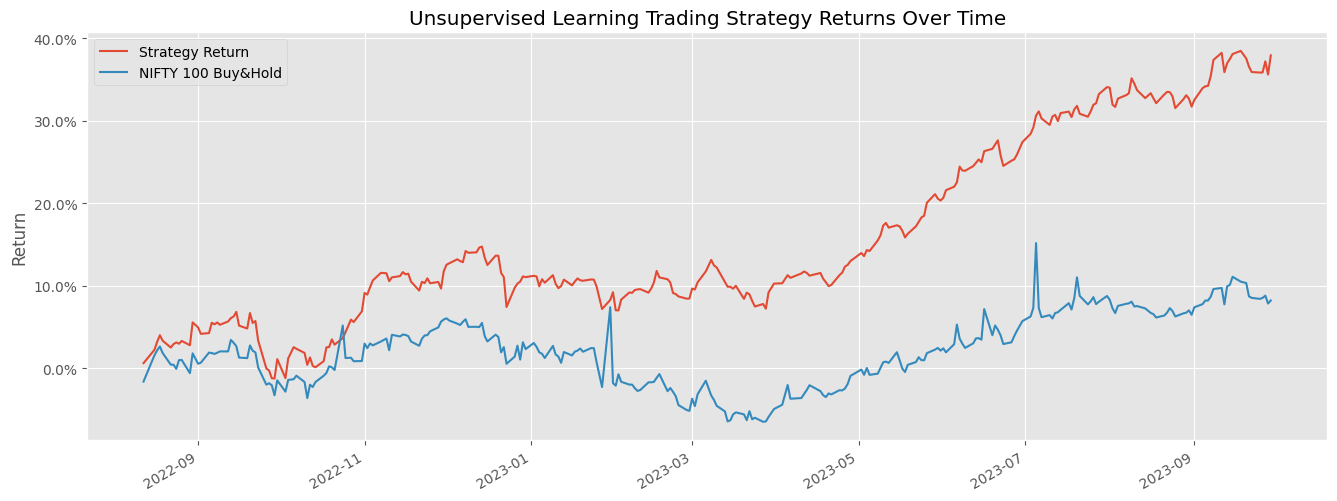

In [ ]:
import matplotlib.ticker as mtick

# Set the style of the plot (ggplot style)
plt.style.use('ggplot')

# Calculate the cumulative return of the portfolio using logarithmic returns
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

# Plot the cumulative return until a specific date ('2023-09-29' in this case)
portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16, 6))

# Set plot title and axis labels
plt.title('Unsupervised Learning Trading Strategy Returns Over Time')
plt.ylabel('Return')

# Set y-axis ticks to display percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Display the plot
plt.show()
